<a href="https://colab.research.google.com/github/Junoflows/ADP_practice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%ED%8C%8C%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__회귀과정__  
데이터 불러오기 > 훈련, 테스트 셋 분류 > 평가지표(R2 -> model.score(X_test, y_test)) >  
GridSearchCV 로 파라미터 훈련 모델링(oob_score 는 선택) > 변수중요도 확인

__분류과정__  
데이터 불러오기 > 훈련, 테스트 셋 분류 > 평가지표(confusion_matrix, accuracy, precision, recall, roc_auc_score, RocCurveDisplay) >  
GridSearchCV 로 파라미터 훈련 모델링(oob_score 는 선택) > 훈련된 모델로 rocCurve 그리기 > 변수중요도 확인

## Chapter0. 머신러닝이란

+ 머신러닝은 데이터의 훈련 샘플들을 학습해 데이터의 규칙과 패턴을 학습하여 결과를 예측하는 알고리즘과 시스템을 연구하는 분야이다.
+ 통계학에서 유래된 머신러닝 기법들이 많다.
+ 머신러닝에서는 데이터에 대한 규칙을 프로그래밍으로 구현하지 않아도 파이썬 API 기반의 라이브러리로 손쉽게 모델을 구축할 수 있다.

### Steps

1. 데이터 확인
> 독립변수 vs 종속변수 확인  
> 연속형 vs 범주형 확인  
> 적용가능한 분석모델 확인(회귀, 분류, 비지도 학습)

2. 전처리
> 표준화(평균 0, 표준편차 1) 또는 MinMax 정규화  
> 결측치 확인 후 처리  
> 이상치 확인 후 처리

3. 데이터 분할
> 학습 : 검증 : 평가 = 7 : 2 : 1 또는 8 : 1 : 1  
> 교차검증방법 적용 가능

4. 모델학습
> 머신러닝 알고리즘 적용
> 회귀 / 분류 / 비지도 학습  
> 최적모델을 결정하기 위해 하이퍼파라미터 탐색 및 조절

5. 성능평가
> 평가셋에 최종 모델을 적용  
> 평가셋에 대한 정확도를 머신러닝 분석에 대한 성능으로 제시

### 지도학습 & 비지도 학습
+ 분류분석 : 학습된 데이터로 종속변수의 Class 예측
+ 회귀분석 : 종속변수의 값을 예측 / 종속변수와 독립변수의 관계 정량화
+ 군집분석 : 데이터의 특성에 따라 묶음으로 유형별 특징을 분석
+ 차원축소 : 다차원의 데이터 셋을 축소하여 새로운 차원의 데이터 셋으로 변환

#### 지도학습
분류
+ Logistic, Naive Bayes, Decision Tree, SVM, 인공신경망, 앙상블(배깅, 랜덤포레스트, 부스팅)

회귀
+ 선형 : 단변량, 다변량, 자기회귀
+ 비선형 : SVM, Decision Tree, 인공신경망, 앙상블

#### 비지도학습
군집분석
+ 계층적 군집분석 - Agglomerative Clustering
+ 비계층적 군집분석 - (K-modes, K-means), (DBSCAN, GMM)

차원축소
+ PCA, FA, SVD, NMF, T-SNE, LDA

#### 머신러닝 로드맵

추후 채울 것

## Chapter1 회귀분석

### 1.1 회귀분석 개념
+ 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현하는 통계기법
+ 변수들 사이의 인과관계를 밝히고 모형을 적합하여 관심있는 변수를 예측하거나 추론하기 위해 사용하는 분석 방법

#### 1.1.1 머신러닝 기법을 이용한 방법

In [ ]:
from sklearn.linear_model import LinearRegression

- LinearRegression 은 계수 $ w = (w_1, ..., w_p)$ 를 사용하여 선형 모델을 피팅합니다.
- 선형 모델은 X_train 으로 선형 근사에 의해 예측된 선형 회귀식과 y_train 사이의 잔여 제곱합을 최소화합니다.
> LinearRegression() : 선형회귀분석 모델을 생성하는 함수  
> fit() : 선형 회귀 모델에 필요한 두 가지 변수(x,y) 를 전달
+ 설명변수의 차원을 조정해야 함
+ R의 summary() 와 같은 기능이 없음
+ 기울기와 절편을 따로 호출해서 얻을 수 있음
+ 잔차를 자동으로 계산해주는 기능이 없음
+ model.coef_ 로 회귀계수 추출가능

#### 1.1.2 Ridge, Lasso, ElasticNet
+ Ridge
> Ridge 회귀는 L2 정규화로 계수 크기에 페널티를 부과하여 일반 최소 제곱의 일부 문제를 해결합니다.  
> 매개변수 : alpha = 1.0

+ Lasso
> Lasso 회귀는 L1 정규화로 희소 계쑤를 추정하는 선형 모델입니다.  
> 매개변수 : alpha = 1.0

+ ElasticNet
> ElasticNet 회귀는 계수의 L1 및 L2 정규화로 훈련된 선형 회귀 모델입니다.  
> 매개변수 : alpha = 1.0, l1_ratio = 0.5


#### 1.1.3 LinearRegression(예제)
[예제]  
boston 데이터로 LinearRegression을 사용하여 선형 회귀분석을 실시한 후, 추정된 회귀모형에 대해 해석하라

In [ ]:
pip install mglearn

In [ ]:
import pandas as pd
import numpy as np
import mglearn
X, y = mglearn.datasets.load_extended_boston()

In [ ]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [ ]:
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [ ]:
# 훈련, 테스트 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(354, 104)
(354,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 회귀 모델 생성
lr.fit(X_train, y_train) # 회귀 모델 학습

LinearRegression()

In [ ]:
# 기울기와 절편은따로 호출하여 확인할 수 있다.
print('기울기 :', lr.coef_)
print('절편 :', lr.intercept_)

기울기 : [-4.98014824e+02  1.02647433e+01 -1.05749863e+02  1.93753242e+00
  3.88815433e+01  6.16937742e+01  3.59807628e+01  1.27964322e+01
 -2.36407811e+01  1.29377833e+02  6.68121794e+00  4.68766804e+01
 -7.11926804e+00  1.63496952e+01  3.93712986e+02  1.31187948e+03
  2.23650593e+02 -8.95384400e+01  8.64901116e+01  2.13805726e+01
  1.35622394e+02  6.21233199e+02 -1.68861387e+03  6.09697936e+02
 -2.32036934e+01  1.20230735e+02 -6.80598549e+00 -3.20804321e+00
 -4.98391346e+00 -5.41938324e+01  8.35208238e+00  7.40762611e+00
 -1.94589902e+01 -4.48896613e+01  5.12918975e+01  1.24595540e+00
  4.17641868e-01 -3.18684023e+01  3.98370271e+01 -6.34743273e+00
 -3.37031708e+00  5.76689853e+01  8.20756961e+00  3.62939768e+01
 -1.24556683e+01  6.06117139e-02 -3.07610730e+00  4.00970115e+01
 -1.73147154e+01  1.93753242e+00 -1.76661246e+01 -3.24166249e+01
 -1.02371249e+01 -3.14484801e+01  8.96951763e+00 -4.14907565e+00
 -1.47969039e+01  4.66181024e+01 -1.71026364e+01 -2.72819479e+01
 -1.92886214e+01  7

In [ ]:
# 추정된 값을 보기 위해서는 모델.predict(x) 를 출력한다.
y_pred = lr.predict(X_test)
y_pred

array([ 26.37509958,  37.87275319,  13.27187162,  21.14544005,
        16.15023011,  16.42856094,  16.4936459 ,  15.19107789,
        21.43004352,  19.006864  ,  16.93965761,  22.24518706,
        16.45198654,  17.48969396,  18.83894727,  25.25534706,
        18.37034714,  10.36812836,  47.06622001,  13.81378376,
        24.55991281,  27.44608931,  15.64579211,  21.01710152,
        18.28370254,  18.51274616,  18.31219651,  14.68367844,
        11.743049  ,  18.82704906,  20.59669153,  24.99448947,
        17.35573152,  27.24415462,  13.63614141,  17.74820272,
        31.84779704,  20.39359762,  17.34368595,  23.07398192,
        16.66506179,  30.62136157,  49.68780443,  15.598856  ,
        25.59980482,  17.54179517,  15.66305723,  25.25839543,
        18.2120236 ,  26.95008311,  23.05277092,  35.69970389,
        18.32727249,  26.91012384,  44.32236266,  23.61803089,
        15.50247945,  32.79589699,  25.74100194,  15.43404159,
        24.05233096,  28.13465586,  29.38871179,  14.25

In [ ]:
# 잔차를 확인하는 방법 : y 값과 추정값의 차를 계산
resid = y_test - y_pred
resid

array([-2.77509958e+00, -5.47275319e+00,  3.28128378e-01,  1.65455995e+00,
       -5.02301139e-02,  3.57143906e+00,  1.30635410e+00, -1.19107789e+00,
       -1.83004352e+00, -2.20686400e+00,  4.56034239e+00, -3.34518706e+00,
       -9.45198654e+00,  3.71030604e+00, -3.38947273e-01,  4.54465294e+00,
        4.29652860e-01, -1.68128360e-01,  2.93377999e+00,  2.86216241e-01,
        6.40087194e-01,  1.65391069e+00, -2.94579211e+00,  1.38289848e+00,
       -4.08370254e+00, -4.71274616e+00,  1.98780349e+00,  2.16321565e-01,
        9.95695100e+00, -5.27049063e-01,  2.50330847e+00, -1.19448947e+00,
       -2.35573152e+00, -6.44415462e+00,  5.46385859e+00,  1.65179728e+00,
        2.85220296e+00, -8.93597615e-01,  7.05631405e+00,  3.26018079e-01,
        3.03493821e+00, -2.42136157e+00,  3.12195566e-01,  1.80114400e+00,
       -2.99980482e+00, -2.44179517e+00, -2.56305723e+00, -1.05839543e+00,
        1.68797640e+00, -2.95008311e+00, -4.15277092e+00, -2.99703894e-01,
       -3.12727249e+00, -

In [ ]:
# R2
print('훈련 데이터 셋 성능 :', lr.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', lr.score(X_test, y_test))

훈련 데이터 셋 성능 : 0.9469794920108195
테스트 데이터 셋 성능 : 0.6610321968877393


In [ ]:
# mse
(resid**2).sum() / len(y_test)

25.257540307733816

In [ ]:
## rmse
np.sqrt((resid**2).sum() / len(y_test))

5.02568804321695

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

25.257540307733816
5.02568804321695


+ R2 값이 훈련데이터에 비해 테스트 데이터셋이 더 작으므로 과대적합임을 알 수 있다.
+ R2 값이 0.648은 좋은 성능이 아니다.
+ 모델의 성능을 높이려면, 과대 적합을 조정해주어야 한다.

### 1.2 Ridge, Lasso, ElasticNet
+ Ridge, Lasso, ElasticNet 은 모두 alpha 값에 영향을 받는다.
+ alpha 값을 통해 과대 적합을 피할 수 있다.
+ alpha 값이 너무 크면 과소적합이 될 수 있으므로 최적의 값을 찾아야 한다.

#### 1.2.1 GridSearchCV
+ 모델에 지정된 매개변수 값에 대해 주어진 목록을 탐색해주는 함수이다.

#### 1.2.2 Ridge(예제)

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import mglearn
X,y = mglearn.datasets.load_extended_boston()
# 훈련, 테스트 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.linear_model import Ridge

ridge = Ridge() # alpha = 1 이 기본값
ridge.fit(X_train, y_train)

# R2
print("사용한 데이터 컬럼 수 :", np.sum(ridge.coef_ != 0))
print('훈련 데이터 셋 성능 :', ridge.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', ridge.score(X_test, y_test))

사용한 데이터 컬럼 수 : 104
훈련 데이터 셋 성능 : 0.8636034860891284
테스트 데이터 셋 성능 : 0.8334633607570349


+ alpha = 1로 하였을 때, R2 = 0.83임을 알 수 있다.
+ LinearRegression 모델의 R2 = 0.66 보다는 성능이 좋지만 Ridge 의 최적화된 값임은 알 수 없다.

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha' : (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1.0, 2.0 ,3.0)}
model_ridge = GridSearchCV(ridge, param_grid)
model_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1.0, 2.0,
                                   3.0)})

In [ ]:
model_ridge.best_estimator_

Ridge(alpha=0.05)

In [ ]:
model_ridge = Ridge(alpha = 0.05)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.05)

In [ ]:
# R2
print("사용한 데이터 컬럼 수 :", np.sum(model_ridge.coef_ != 0))
print('훈련 데이터 셋 성능 :', model_ridge.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', model_ridge.score(X_test, y_test))

사용한 데이터 컬럼 수 : 104
훈련 데이터 셋 성능 : 0.9236984821715983
테스트 데이터 셋 성능 : 0.818778886216631


#### 1.2.3 Lasso(예제)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

# R2
print("사용한 데이터 컬럼 수 :", np.sum(lasso.coef_ != 0))
print('훈련 데이터 셋 성능 :', lasso.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', lasso.score(X_test, y_test))

사용한 데이터 컬럼 수 : 3
훈련 데이터 셋 성능 : 0.26711442647227945
테스트 데이터 셋 성능 : 0.24833962305738366


+ Lasso의 경우 Ridge 와 다르게 사용하는 데이터 컬럼 자체를 0으로 만들어 변수 선택법과 같이 삭제를 해줄 수 있다.
- 위의 결과값의 경우 훈련 데이터셋 자체의 성능이 낮으므로 과소적합이 되었음을 알 수 있다.
- 과소적합읠 해결하기 위해 alpha 값을 조정한다.

In [ ]:
lasso = Lasso()
param_grid = {'alpha' : (0.0001, 0.0005, 0.001, 0.002, 0.003, 0.005, 0.01, 0.15, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1, 2, 3)}
model_lasso = GridSearchCV(lasso, param_grid)
model_lasso.fit(X_train, y_train)

print('best model :', model_lasso.best_estimator_)

best model : Lasso(alpha=0.001)


In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha = 0.001)
model_lasso.fit(X_train, y_train)

# R2
print("사용한 데이터 컬럼 수 :", np.sum(model_lasso.coef_ != 0))
print('훈련 데이터 셋 성능 :', model_lasso.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', model_lasso.score(X_test, y_test))

사용한 데이터 컬럼 수 : 73
훈련 데이터 셋 성능 : 0.9301687092322911
테스트 데이터 셋 성능 : 0.7952457710491014


+ 73 개의 컬럼을 사용하고 패널티를 적용하였을 때, Lasso 회귀는 0.79의 설명력을 가짐을 알 수 있다.

#### 1.2.4 ElasticNet(예제)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet() # alpha=1.0, l1_ratio=0.5 가 기본값
elastic.fit(X_train, y_train)

# R2
print("사용한 데이터 컬럼 수 :", np.sum(elastic.coef_ != 0))
print('훈련 데이터 셋 성능 :', elastic.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', elastic.score(X_test, y_test))

사용한 데이터 컬럼 수 : 38
훈련 데이터 셋 성능 : 0.2846405113369992
테스트 데이터 셋 성능 : 0.28046293554900226


In [ ]:
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet()
param_grid = {'alpha' : (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1, 2, 3),
              'l1_ratio' : np.arange(0.1, 1.0, 0.1)}

model_elastic = GridSearchCV(elastic, param_grid)
model_elastic.fit(X_train, y_train)

print('best params :', model_elastic.best_params_)

best params : {'alpha': 0.0005, 'l1_ratio': 0.5}


In [ ]:
model_elastic = ElasticNet(alpha = 0.0005, l1_ratio = 0.5)
model_elastic.fit(X_train, y_train)

# R2
print("사용한 데이터 컬럼 수 :", np.sum(model_elastic.coef_ != 0))
print('훈련 데이터 셋 성능 :', model_elastic.score(X_train, y_train))
print('테스트 데이터 셋 성능 :', model_elastic.score(X_test, y_test))

사용한 데이터 컬럼 수 : 99
훈련 데이터 셋 성능 : 0.916683017536598
테스트 데이터 셋 성능 : 0.8364575137697421


+ 99개의 데이터 컬럼을 사용하고 패널티를 적용하였을 때 ElasticNet 회귀의 경우 0.83의 설명력을 가짐을 알 수 있다.

In [ ]:
model_elastic.coef_

array([ -2.86021769,  -4.76995562,   0.15929522,   3.59055309,
        12.88448725,  22.16519918,   7.16387974, -12.67298985,
        14.67868258,  -2.01851942,  -0.92635441,  14.28495571,
        -5.50029563,   5.82493522,   0.        ,  -2.11769176,
        10.14633487,  -0.87533453,   4.73983577,  -3.24379985,
        -0.        ,  -6.03576153,  -4.75544364,  -4.29349451,
         2.61080454,  -1.56850798,   2.31963035,  -0.        ,
         5.46753697,   0.37724755,   4.81568254,  -2.27123345,
        -1.44995007,  -2.17615478,   7.3691262 ,   3.92219048,
        -1.18983908,  -5.7470498 ,   5.02280786,   2.81234426,
         7.65074545,   4.13230414,   7.76717303,  -3.82538926,
        -5.29778791,   0.93665366, -11.25065109,  -1.19051905,
       -15.62741401,   1.95150196, -16.07280729, -20.09124333,
         2.24883322,  -8.23297116,   5.91804979,   7.51279894,
        -4.06516495,  11.21243271,  -7.82027438,  -6.72337333,
        -5.76004918,  -5.11988084,   0.        ,  -3.13

+ 회귀 계수를 해석해야 할 경우, 0인 값을 제외하고 위와 같이 패널티가 적용된 회귀 계수를 가지고 해석하면 된다.

In [ ]:
# 회귀 모델 별 성능 비교
print('ridge R2 :', model_ridge.score(X_test, y_test))
print('lasso R2 :', model_lasso.score(X_test, y_test))
print('ElasticNet R2 :', model_elastic.score(X_test, y_test))

ridge R2 : 0.818778886216631
lasso R2 : 0.7952457710491014
ElasticNet R2 : 0.8364575137697421


## Chapter2 의사결정 나무(Decision Tree)

### 2.0 의사결정 나무 개요
+ 용어
> Root node : 처음 시작하는 마디  
> Leaf node : 끝 마디  
> Edge : 연결 선  
> Depth : 깊이(최장으로 연결된 질문의 수)

+ 장점
> 데이터 스케일에 영향을 받지 않는다.  
> 특히, 데이터 내에 이진 특성과 연속적 특성이 혼합되어 있어도 무관하다.  
> 결정트리 모델이 어떻게 훈련되었는지 경로로 해석이 가능하다. 즉, 설명력이 좋다.

+ 단점
> 가지치기를 하더라도 과대적합이 되는 경향이 있다.  
> 모델의 일반화 성능이 좋지 않다.

+ 매개변수 튜닝
> max_depth : 최대 가지치기 수  
> min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수  
> min_samples_leaf : 리프 노드에 있어야 하는 최소 샘플 수


### 2.1 의사결정나무(분류)

#### 2.1.1 개념

가. 성장단계
+ 각 마디에서 적절한 최적의 분리규칙(splitting rule)을 찾아서 나무를 성장시키는 과정으로 적절한 정지규칙(stopping rule) 을 만족하면 중단한다.
+ 분리규칙을 설정하는 분리기준(splitting criterion)은 이산형 목표변수, 연속형 목표변수에 따라 다르다.
+ 범주형 목표변수
> 지니지수를 감소시켜주는 예측변수와 그 때의 최적 분리에 의해서 자식마디를 형성  
> 엔트로피지수가 가장 작은 예측변수와 이 떄의 최적 분리에 의해 자식마디를 형성

나. 가지치기 단계
+ 나무의 크기를 모형의 복잡도로 볼 수 있음
+ 과적합 방지를 위함
+ max_depth : int, default = None
  - 트리의 최대 깊이
+ min_samples_split : int or float, default = 2
  - 내부 노드를 분할하는데 필요한 최소 샘플 수
+ min_samples_leaf : int or float, default = 1
  - 리프노드에 있어야 하는 최소 샘플 수
+ criterion : {"gini", "entropy"}, default = "gini"
  - 분할할 때 사용할 함수
+ splitter : {"best", "random"}, default = "best"
  + 분할방법
    + best : 분할 시 가장 좋은 노드 선택
    + random : 임의적으로 노드 선택
+ ccp_alphanon-negative : float, default = 0.0
  - pruning(가지치기) 에 가용하는 파라미터
  - 최소비용 - 복잡성 정리에 사용되는 복잡성 매개변수
  - ccp_alpha 보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
  - default 로 할 경우 pruning 은 수행되지 않음

__예시__
```
 sklearn.tree.DecisionTreeClassifier(*, criterion = 'gini', splitter = 'best', max_depth = None,
 min_samples_split = 2, min_samples_leaf = 1, max_features = None, random_state = None, ccp_alpha = 0.0)
```

#### 2.1.2 DecisionTreeClassifier(예제)

credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 의사결정 나무 모델 만들어라

In [ ]:
import pandas as pd
import numpy as np
import requests

# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [ ]:
# 설명변수(X), 종속변수(y) 분리
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   account.balance                 1000 non-null   int64
 1   credit.duration.months          1000 non-null   int64
 2   previous.credit.payment.status  1000 non-null   int64
 3   credit.purpose                  1000 non-null   int64
 4   credit.amount                   1000 non-null   int64
 5   savings                         1000 non-null   int64
 6   employment.duration             1000 non-null   int64
 7   installment.rate                1000 non-null   int64
 8   marital.status                  1000 non-null   int64
 9   guarantor                       1000 non-null   int64
 10  residence.duration              1000 non-null   int64
 11  current.assets                  1000 non-null   int64
 12  age                             1000 non-null   int64
 13  othe

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련셋, 테스트셋 분리
# stratify 는 y 의 0, 1 비율대로 train, test 를 나눈다는 것으로 예들들어 추출 비율은 5:5인데 실제 비율이 8:2 인 상황을 방지
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()

# 모델 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 학습용 데이터에 대한 정확도(Accuracy)
dt_clf.score(X_train, y_train)

1.0

In [ ]:
# 테스트 데이터에 대한 정확도
dt_clf.score(X_test, y_test)

0.71

In [ ]:
# 예측
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, f1_score, recall_score, RocCurveDisplay # plot_roc_curve

confusion_matrix(y_test, dt_prediction)

array([[ 44,  46],
       [ 41, 169]])

In [ ]:
print(precision_score(y_test, dt_prediction))
print(recall_score(y_test, dt_prediction))
print(f1_score(y_test, dt_prediction))

0.786046511627907
0.8047619047619048
0.7952941176470588


In [ ]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50        90
           1       0.79      0.80      0.80       210

    accuracy                           0.71       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.71      0.71      0.71       300



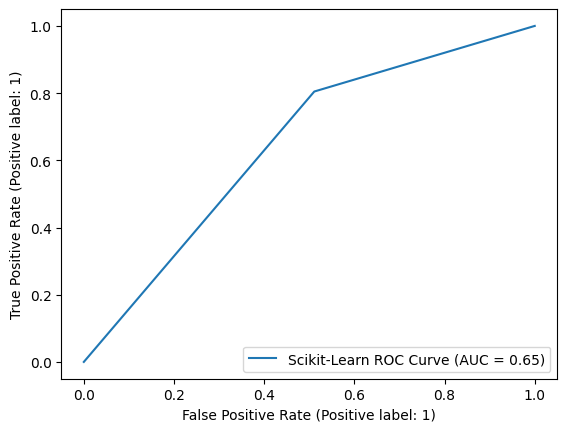

In [ ]:
RocCurveDisplay.from_estimator(dt_clf, X_test, y_test, name="Scikit-Learn ROC Curve")

In [ ]:
# roc_auc_score
roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1])

0.6468253968253969

#### 2.1.3 가지치기 (pruning)

##### 주요 매개변수 조정

In [ ]:
dt_clf.get_depth()

16

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : range(2, 16, 1), 'min_samples_leaf' : range(1,20,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
model_grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 20)})

In [ ]:
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=9)

In [ ]:
model_grid_tree.best_params_

{'max_depth': 7, 'min_samples_leaf': 9}

In [ ]:
model_grid_tree.best_score_

0.7271428571428572

In [ ]:
model_grid_tree.score(X_test, y_test)

0.71

In [ ]:
y_pred = model_grid_tree.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 38,  52],
       [ 35, 175]])

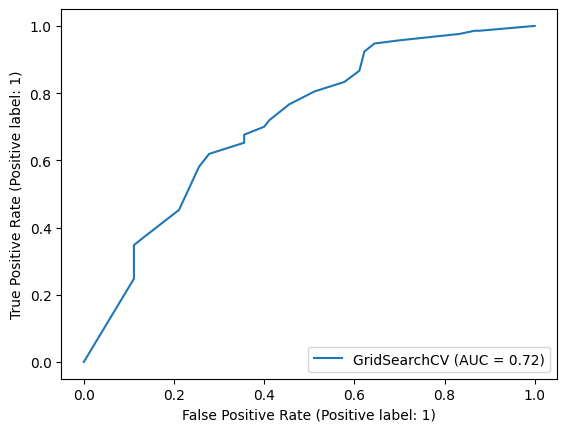

In [ ]:
RocCurveDisplay.from_estimator(model_grid_tree, X_test, y_test)

In [ ]:
roc_auc_score(y_test, model_grid_tree.predict_proba(X_test)[:,1])

0.7151322751322751

__결과해석__
1. 과적합을 막고, 최적의 분류 모델을 찾기 위해 GridSearchCV 를 사용하였다.
2. max_depth = 7, min_samples_leaf = 9 로 모델을 학습시켰다.
3. 결과 ROC_AUC_SCORE 는 0.71로 준수하다고 볼 수 없다.
4. 다른 모델을 통해 정확도를 향상시킬 방안을 찾아봐야 한다.

##### ccp_alpha 로 수행(참고)

+ ccp_alphanon-negative : float, default = 0.0
  + pruning 에 사용하는 파라미터
  + 최소비용 - 복잡성 정리에 사용되는 복잡성 매개변수
  + ccp_alpha 보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
  + default 로 할 경우 pruning 은 수행되지 않음

In [ ]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.0009127 , 0.00093371, 0.00119048, 0.00126832,
        0.00126984, 0.0012987 , 0.00131868, 0.00133929, 0.00135338,
        0.00141215, 0.00142857, 0.00151429, 0.0017316 , 0.00179592,
        0.00183168, 0.00187453, 0.00190476, 0.00190476, 0.00190476,
        0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
        0.0019936 , 0.002     , 0.0021645 , 0.00217687, 0.00222222,
        0.0022381 , 0.00232143, 0.00233333, 0.00234432, 0.00238095,
        0.00238095, 0.00243609, 0.00244898, 0.00244898, 0.00245286,
        0.0025    , 0.0025    , 0.00250043, 0.00257143, 0.00266667,
        0.00266667, 0.00276722, 0.00326531, 0.00336099, 0.0035    ,
        0.00360144, 0.00360225, 0.00381594, 0.00396825, 0.00412121,
        0.00412512, 0.00435335, 0.00458009, 0.00463623, 0.00473392,
        0.00480004, 0.00622504, 0.00681694, 0.00686867, 0.01088453,
        0.0142366 , 0.04349765]),
 'impurities': array([0.        , 0.0027381 , 0.00553922, 0.00792017

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

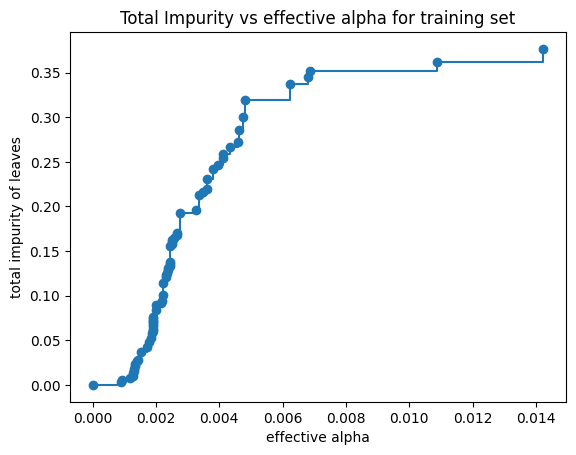

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_xlabel("effective alpha")
ax.set_ylabel('total impurity of leaves')
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
dt_clf_pr = DecisionTreeClassifier(ccp_alpha = 0.0055)
dt_clf_pr.fit(X_train , y_train)
dt_prediction_pr = dt_clf_pr.predict(X_test)

In [ ]:
confusion_matrix(y_test, dt_prediction_pr)

array([[ 48,  42],
       [ 29, 181]])

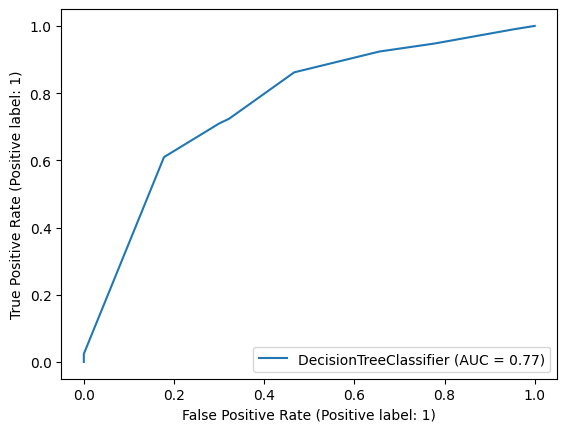

In [ ]:
RocCurveDisplay.from_estimator(dt_clf_pr, X_test, y_test)

In [ ]:
roc_auc_score(y_test, dt_clf_pr.predict_proba(X_test)[:,-1])

0.7668783068783069

### 2.2 의사결정나무 (회귀)

#### 2.2.1 개념

```
sklearn.tree.DecisionTreeRegressor
```

+ 연속형 목표변수
> 분산분석에서 F 통계량 : p 값이 가장 작은 예측변수와 그 때의 최적분리에 의해 자식마디를 형성  
> 분산의 감소량 : 분산의 감소량을 최대화하는 기준의 최적분리에 의해서 자식마디를 형셩

+ criterion : {"squared_error", "friedman_mse", "absolute_error", "poisson"}, default = "squared_error"
  + 분할할 때 사용할 함수

+ splitter : {"best", "random"}, default = "best"
  + 분할방법
    + best : 분할 시 가장 좋은 노드 선택
    + random : 임의적으로 노드 선택

+ max_depth : int, default = None
  - 트리의 최대 깊이

+ min_samples_split : int or float, default = 2
  - 내부 노드를 분할하는데 필요한 최소 샘플 수

- min_samples_leaf : int or float, default = 1
  - 리프노드에 있어야 하는 최소 샘플 수

- max_features : int or float or {'auto', 'sqrt', 'log2'}, default = None
  - 최상의 분할을 찾을 때 고려할 함수
    - auto : 제곱근으로 함
    - sqrt : 제곱근
    - log2 : 로그

- random_state
  - 추정량의 임의성을 제어함

+ ccp_alphanon-negative : float, default = 0.0
  + pruning 에 사용하는 파라미터
  + 최소비용 - 복잡성 정리에 사용되는 복잡성 매개변수
  + ccp_alpha 보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
  + default 로 할 경우 pruning 은 수행되지 않음

```
sklearn.tree.DesicionTreeRegressor(*, criterion = 'squared_error', splitter = 'best', max_depth = None,
                                   min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0,
                                   max_features = None, random_state = None, max_leaf_nodes = None,
                                   min_impurity_decrease = 0.0, ccp_alpha = 0.0)
```

#### 2.2.2 DecisionTreeRegressor(예제)

kc_house_data 로 train 데이터로 price 를 예측하는 모델을

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
X = df.drop(['id','date', 'price'], axis = 1)
y = df['price']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  object 
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 2.5+ MB


In [ ]:
X.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
X = pd.get_dummies(data = X, columns = ['waterfront'])

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_river_view,waterfront_standard
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650,0,1
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639,0,1
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062,0,1
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000,0,1
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train ,y_train)

print(dt_reg.score(X_train, y_train))
print(dt_reg.score(X_test, y_test))

0.9993439722718961
0.5165639075095507


In [ ]:
dt_reg.get_depth()

39

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : range(1, 40, 2), 'min_samples_leaf' : range(2, 40, 2)}

model_grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid)
model_grid_tree.fit(X_train, y_train)

model_grid_tree.best_params_

{'max_depth': 9, 'min_samples_leaf': 4}

In [ ]:
# R2
model_grid_tree.score(X_train, y_train)

0.7989456723085262

In [ ]:
# R2
model_grid_tree.score(X_test, y_test)

0.627049241258044

In [ ]:
y_pred = model_grid_tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

53841607495.697426

In [ ]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

232037.94408608568

__결과해석__
1. R2 값은 0.62로 모델이 전체 데이터의 62% 를 설명할 수 있다.
2. RMSE 값은 232037로 집값의 평균적인 차이는 202226 만큼 난다고 할 수 있다.

### 2.3 의사결정나무(시각화)

https://graphviz.org/download/

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image
import pydot
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

iris 데이터의 Speicies 를 분류하는 의사결정나무 분석을 실시하고 오분류표를 만들어보자

In [ ]:
# 데이터 준비
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 훈련셋 평가셋 분류하기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
# 의사결정나무 모델 실행
iris_clf = DecisionTreeClassifier()
iris_clf.fit(X_train, y_train)
iris_pred = iris_clf.predict(X_test)

In [ ]:
feature_columns = iris.feature_names
feature_columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

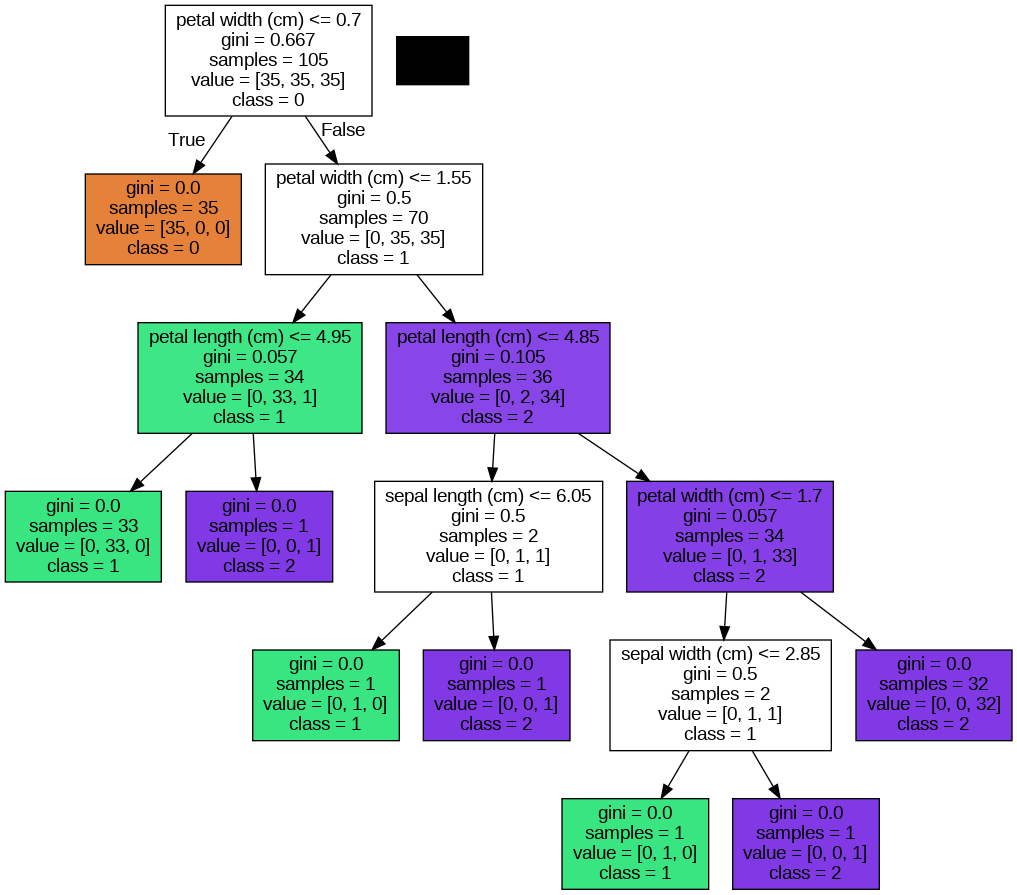

In [ ]:
from sklearn import tree
# 의사결정나무 시각화

# 시각화 라이브러리에 삽입해야하는 변수 생성하기
# 원본 데이터의 변수이름을 추출하고, 타겟변수 이름을 0, 1로 설정
feature_names = feature_columns
target_names = np.array(['0', '1', '2'])

# Graphviz 로 의사결정나무 시각화하기
dt_dot_data = tree.export_graphviz(iris_clf, feature_names = feature_names, class_names = target_names, filled = True, max_depth = 5)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

In [ ]:
# 분류 리포트 생성하기
class_report_iris = classification_report(y_test, iris_pred)
print(class_report_iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
confusion_matrix(y_test, iris_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, iris_clf.predict_proba(X_test), multi_class = 'ovr')

0.9333333333333332

## Chapter3 앙상블(ensemble)


### 3.0 개념
- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 방법이다.
- 편향, 잡음, 분산으로 인한 오류와 같은 문제를 회피하기 위해 사용된다.
- 의사결정나무에서 주로 사용한다. (과적합을 막기 위함)
- 배깅(bagging), 부스팅(boosting), 랜덤 포레스트(random forest)가 가장 대표적
- 스태킹 알고리즘(앙상블과 유사하지만 예측 결과를 종합하는 것이 다른 점)
  - 여러 모델들을 활용해 각각의 예측 결과를 도출한 뒤 그 예측 결과를 다시 학습하여 최종 예측 결과를 만들어내는 방법

### 3.1 배깅과 부스팅

#### 3.1.1 배깅 개념
+ 부스트랩(Boostrap)
> 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법(중복허용)을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법  
주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산

__Out of bag sample__  
> boostrapping 을 수행하면 평균적으로 각 예측기에 훈련 데이터의 63% 정도만 샘플링 되는데, 이 때 선택되지 않은 나머지 37%를 Out of bag 샘플이라고 한다.(예측기마다 남겨진 37% 는 모두 다름)  
oob_score = True 설정하면 oob 데이터를 모델의 평가를 위해 사용한다.(검증 세트나 교차 검증이 필요없음)

+ 주어진 자료를 모집단으로 생각하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각 부스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방법
+ 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 피하도록 함
+ 보팅(voting) : 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 선정하는 과정
+ 최적 의사결정 나무 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 나무를 최대로 성장시킨 후 보팅함
+ 훈련자료의 모집단의 분포를 몰라 평균예측모형을 구할 수 없다는 문제를 해결하기 위해 훈련 자료를 모집단으로 생각하고 평균예측모형을 구해 분산을 줄이고 예측력을 향상시킴

+ 부스팅과의 차이점
  - 주어진 자료보다 분산이 적은 앙상블 모델을 얻는데 중점을 둠
  - 각 부스트랩에 대해 부스트래핑 및 모델링 과정이 병렬적으로 수행됨

```
sklearn.ensembl.BaggingClassifier(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)
```
```
sklearn.ensembl.BaggingRegressor(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)
```

> base_estimator : 배깅에서 수행할 분류기로 None 이면 DecisionTreeClassifier/DecisionTreeRegressor 를 수행  
n_estimators : 앙상블의 분류기 모델의 수 (int, default = 10)  
max_samples : 각 기본 추정량을 훈련하기 위해 추출할 샘플 수 (int or float, default = 1.0)  
max_features : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수 (int or float, default = 1.0)  
boostrap : 샘플(행)을 복원추출할 지 여부 (bool, default = True)  
boostrap_features : feature(열)를 복원추출할 지 여부 (bool, default = True)  
oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할 지 여부 (bool, default = False)

> BaggingRegressor().fit(X,y) # 모델 적합  
BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측  
BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

#### 3.1.2 부스팅 개념
+ 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법이다.
+ 부스트랩을 병렬로 수행(각 모델을 독립적으로 구축)하는 배깅과 달리 순차방식으로 학습을 진행한다.
+ 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
+ train 데이터에 과적합할 위험이 있다.

분류의 경우
```
sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate = 1.0)
```

회귀의 경우
```
sklearn.ensemble.AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate = 1.0)
```

base_estimator : 부스팅에서 수행할 분류기로 None 이면 DecisionTreeClassifier/DecisionTreeRegressor 을 수행  
n_estimators : 부스팅이 종료되는 최대 분류기의 수 (int, default = 50)

### 3.2 배깅

#### 3.2.1 배깅(회귀)

```
sklearn.ensembl.BaggingRegressor(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)
```

> BaggingRegressor().fit(X,y) # 모델 적합  
BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측  
BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

[예제]  
kc_house_data.csv 를 train 과 test 데이터로 분할하고 train 데이터를 활용하여 BaggingRegressor 모델을 만들어라

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
X = df.drop(['id','date','price'], axis = 1)
y = df['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import BaggingRegressor
model_bag_reg = BaggingRegressor(n_estimators = 100, oob_score = False)
model_bag_reg.fit(X_train, y_train)

# R2
print(model_bag_reg.score(X_train, y_train))
print(model_bag_reg.score(X_test, y_test))

0.9666105135007612
0.7259132526944463


In [ ]:
# Out of Bag 샘플을 활용한 성능 측정
model_bag_reg_oob = BaggingRegressor(n_estimators = 100, oob_score = True) # oob_score = True 로 하면 검증세트나 교차검증이 필요없음
model_bag_reg_oob.fit(X, y)

print('oob score :', model_bag_reg_oob.oob_score_)

oob score : 0.7525733827561754


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = model_bag_reg.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse :' , rmse)

rmse : 345.1945797726877


In [ ]:
from sklearn import tree
model_bag_reg.estimators_[0].feature_importances_

array([0.00746607, 0.02039618, 0.25325066, 0.02848514, 0.00703858,
       0.01511273, 0.00705957, 0.3957297 , 0.01828754, 0.01840947,
       0.09477097, 0.0042396 , 0.05625333, 0.04360553, 0.00462064,
       0.02527429])

In [ ]:
## 변수 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_bag_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importance']
feature_importances

# 변수의 상대적 중요도를 보았을 때 회귀 계수처럼 파악을 할 수 있다.
# 변수 중요도가 큰 것을 파악할 수 있음

,col_name,feature_importance
0,bedrooms,0.007148
1,bathrooms,0.024121
2,sqft_living,0.273163
3,sqft_lot,0.033003
4,floors,0.005551
5,view,0.016947
6,condition,0.006976
7,grade,0.365394
8,sqft_above,0.027920
9,sqft_basement,0.014357


In [ ]:
# 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending= False).reset_index(drop = True)
feature_importances

,col_name,feature_importance
0,grade,0.365394
1,sqft_living,0.273163
2,yr_built,0.097919
3,sqft_living15,0.061839
4,sqft_lot15,0.038917
5,sqft_lot,0.033003
6,sqft_above,0.027920
7,bathrooms,0.024121
8,view,0.016947
9,sqft_basement,0.014357


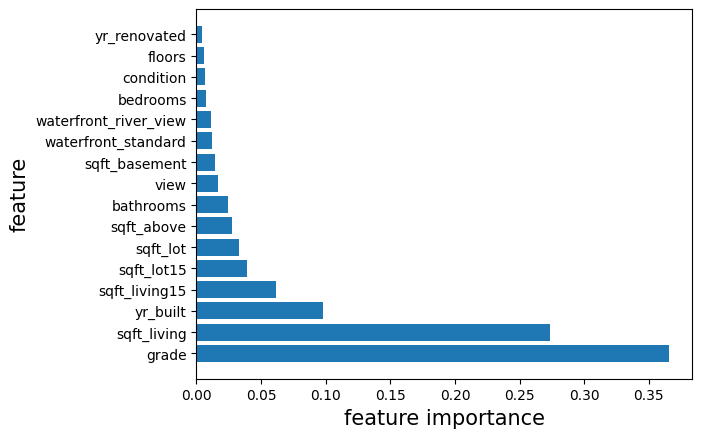

In [ ]:
# 변수 중요도 시각화
import matplotlib.pyplot as plt

plt.barh(feature_importances['col_name'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

#### 3.2.2 배깅(분류)

```
sklearn.ensembl.BaggingClassifier(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)
```

> BaggingClassifier().fit(X, Y) # 모델 적합  
BaggingClassifier().predict(X) # 모델을 사용하여 분류 결과 예측  
BaggingClassifier().predict_proba(X) # X의 각 행에 대해 Y 값의 각 클래스 확률  
BaggingClassifier().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

[예제]  
credit 데이터를 train과 test 데이터로 분할하고 train 데이터를 활용하여 Bagging 모델을 만들어라

In [ ]:
import pandas as pd
import numpy as np

# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [ ]:
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.ensemble import BaggingClassifier # 배깅

# 분류기 100개 생성, 샘플의 100%(복원추출)와 컬럼 모두의 무작위 하위 집합을 기반으로 함
clf = BaggingClassifier(base_estimator= DecisionTreeClassifier(),
                        n_estimators= 100, max_samples = 1.0, max_features=1.0)

clf.fit(X_train ,y_train)
y_pred = clf.predict(X_test)
print('accuracy :', clf.score(X_test, y_test))

accuracy : 0.7666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import precision_score, recall_score, f1_score

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = ['True[0]', 'True[1]'],
             columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],51,41
True[1],29,179


__ROC 곡선__
+ x축은 특이도, y축은 재현율(민감도)을 가지는 그래프
+ 재현율(TPR)은 1이고, 특이도(FPR)는 0인 경우가 가장 이상적
> 재현율 : 실제 True 일 때 True 라고 예측하는 비율  
특이도 : 실제 False 일 때 False 라고 예측하는 비율

__AUC__
+ ROC 곡선의 아래 면적을 계산한 것으로 값이 클수록 모델의 성능이 좋다고 판단 가능

__roc_auc_score__
+ 이진 분류 : roc_auc_score(Y, clf.predict_proba(X)[:,1])
+ 다중 분류 : roc_auc_score(y, clf.predict_proba(X), multi_class = 'ovr)
+ 여러 개의 라벨을 분류 : roc_auc_score(y, y_pred, average = None)

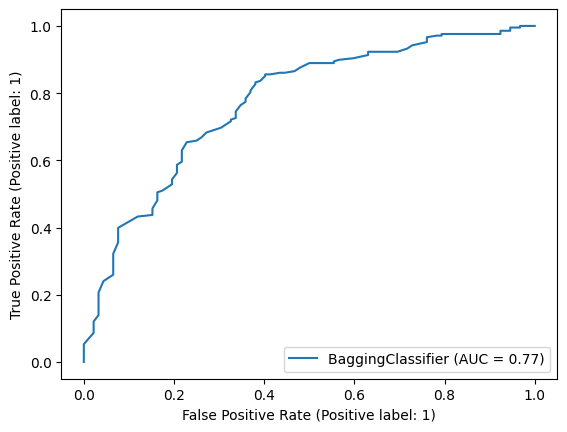

roc_auc_score : 0.7727581521739131


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

print('roc_auc_score :', roc_auc_score(y_test, clf.predict_proba(X_test)[:, -1]))

__oob_score__  
> boostrapping 을 수행하면 평균적으로 각 예측기에 훈련 데이터의 63% 정도만 샘플링 되는데, 이 때 선택되지 않은 나머지 37%를 Out of bag 샘플이라고 한다.(예측기마다 남겨진 37% 는 모두 다름)  
oob_score = True 설정하면 oob 데이터를 모델의 평가를 위해 사용한다.(검증 세트나 교차 검증이 필요없음)

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators = 100, max_samples = 1.0,
                        max_features = 1.0, oob_score = True)

clf.fit(X, y)
clf.oob_score_

0.765

In [ ]:
# 변수 중요도 확인
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in clf.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importance']
feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending= False).reset_index(drop = True)
feature_importances

,col_name,feature_importance
0,credit.amount,0.173930
1,account.balance,0.126976
2,age,0.121528
3,credit.duration.months,0.108780
4,previous.credit.payment.status,0.049262
5,savings,0.046422
6,employment.duration,0.045618
7,current.assets,0.045346
8,residence.duration,0.040493
9,credit.purpose,0.039879


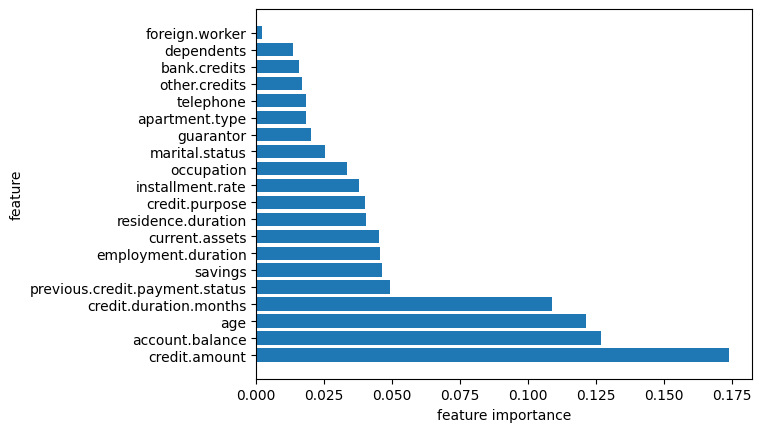

In [ ]:
# 변수 중요도 시각화
plt.barh(feature_importances['col_name'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

### 3.3 랜덤 포레스트(Random Forest)

+ 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법
+ 수천 개의 변수를 변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보임
+ 이론적 설명이나 최종 결과에 대한 해석이 어렵다는 단점이 있지만 예측력이 매우 높은 것으로 알려져 있음
+ 입력변수가 많은 경우 배깅과 부스팅과 비슷하거나 좋은 예측력을 보임

회귀의 경우
```
sklearn.ensemble.RandomForestRegressor(...)
```

분류의 경우
```
sklearn.ensemble.RandomForestClassifier(...)
```

+ n_estimators : RandomForest 에서 나무의 수 (int, default = 100)
+ criterion : 분할의 품질을 측정하는 방법 ({'gini', 'entropy'}, default = 'gini')
+ max_depth : 나무의 최대 깊이 (int, default = None)
+ min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (int or float, default = 2)
+ min_samples_leaf : 리프 노드에 있어야하는 최소 샘플 수 (int or float, default = 1)
+ max_leaf_nodes : 리프 노드의 최대 개수로 None이면 제한없음 (int, default = None)
+ boostrap : 나무를 만들 때 부스트랩 샘플이 사용되는지 여부 (bool, default = True), False 이면 전체 데이터 세트가 각 트리를 작성하는데 사용
+ oob_score : 정확도 측정을 위해 out-of-bag 샘플을 사용할 지 여부 (bool, default = False)

#### 3.3.1 랜덤 포레스트(회귀)

In [ ]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
X = kc_house.drop(['id', 'date', 'price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators= 50)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print('train R2 :', rf_reg.score(X_train, y_train))
print('test R2 :', rf_reg.score(X_test, y_test))

train R2 : 0.9649817435236727
test R2 : 0.7198657984476395


In [ ]:
# 변수 중요도
rf_reg.estimators_[0].feature_importances_

array([0.00641822, 0.02139893, 0.19570606, 0.03156085, 0.00671275,
       0.00933124, 0.00686741, 0.41601658, 0.02517719, 0.01521164,
       0.11056568, 0.0024503 , 0.0680508 , 0.04183539, 0.00711641,
       0.03558053])

In [ ]:
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in rf_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_names', 'feature_importance']
feature_importances = feature_importances.sort_values(by ='feature_importance', ascending= False).reset_index(drop = True)
feature_importances

,col_names,feature_importance
0,grade,0.374766
1,sqft_living,0.261537
2,yr_built,0.097593
3,sqft_living15,0.061954
4,sqft_lot15,0.038368
5,sqft_lot,0.033822
6,bathrooms,0.029319
7,sqft_above,0.026979
8,view,0.016584
9,sqft_basement,0.013582


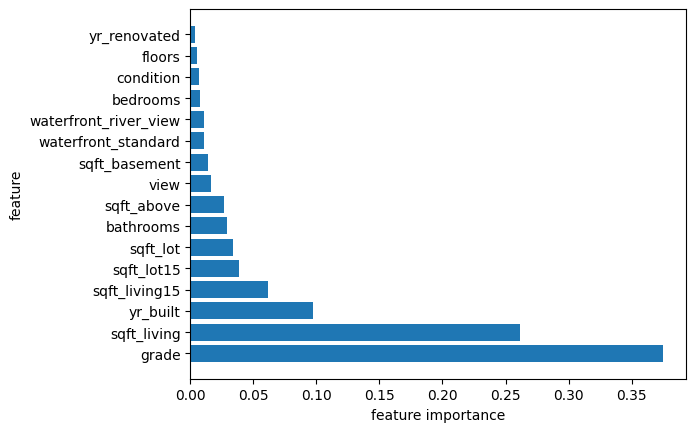

In [ ]:
plt.barh(feature_importances['col_names'], feature_importances['feature_importance'], align= 'center')
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

Out of Bag 샘플을 활용한 성능 측정

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 100, min_samples_split = 5,
                               oob_score = True)
rf_reg.fit(X,y)

# R2
print('oob score :', rf_reg.oob_score_)

oob score : 0.7535847949396765


#### 3.3.2 랜덤 포레스트(분류)

In [ ]:
import pandas as pd
import numpy as np

# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
541,2,48,2,3,3979,4,3,4,3,1,1,3,41,2,2,2,3,2,2,1
440,3,21,3,2,2288,1,1,4,1,1,4,2,23,2,2,1,3,1,2,1
482,3,24,3,4,3863,1,2,1,3,1,2,4,32,2,3,1,3,1,1,1
422,2,16,3,4,1175,1,1,2,3,1,3,3,68,2,3,2,1,1,2,1
778,2,18,3,3,1245,1,2,4,4,1,2,3,33,2,2,1,3,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('Accuracy :', rf_clf.score(X_test, y_test))

Accuracy : 0.7633333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

print('precision :', precision_score(y_test, y_pred))
print('recall :', recall_score(y_test, y_pred))
print('f1 score :', f1_score(y_test, y_pred))

precision : 0.7914893617021277
recall : 0.8942307692307693
f1 score : 0.8397291196388263


In [ ]:
# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = ['True[0]', 'True[1]'],
             columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],43,49
True[1],22,186


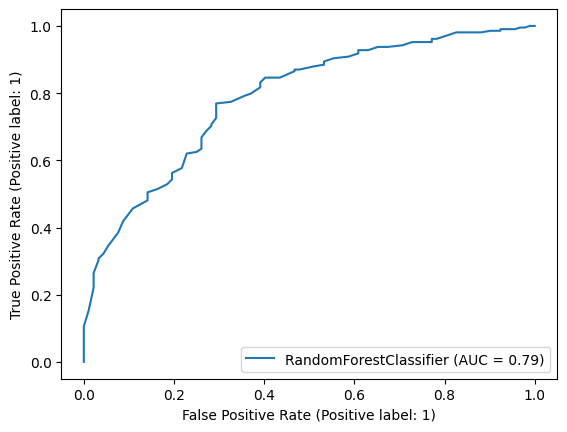

roc_auc score : 0.7864234949832776


In [ ]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

print('roc_auc score :', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,-1]))

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : range(2,10,2), 'min_samples_leaf' : range(2, 10, 2)}
model_grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
model_grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 10, 2)})

In [ ]:
model_grid_rf.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=340869520),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1731683057),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=2060328360),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=826808523),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=509310137),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1381488459),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1878386741),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        rando

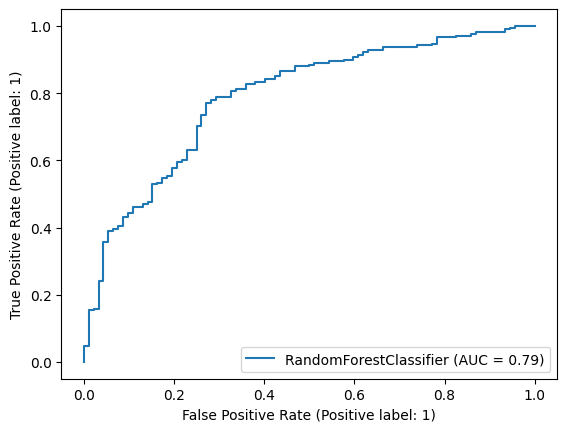

0.787834448160535

In [ ]:
RocCurveDisplay.from_estimator(model_grid_rf.best_estimator_, X_test, y_test)
plt.show()

roc_auc_score(y_test, model_grid_rf.predict_proba(X_test)[:,1])

In [ ]:
model_grid_rf.best_estimator_.estimators_[0].feature_importances_

array([0.11720813, 0.06729369, 0.14473267, 0.04295033, 0.13778662,
       0.05519399, 0.06397846, 0.07107732, 0.03573731, 0.0230696 ,
       0.01092625, 0.01172022, 0.09007981, 0.        , 0.        ,
       0.00971223, 0.03382852, 0.03795343, 0.04675141, 0.        ])

In [ ]:
# 변수 중요도 확인
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_rf.best_estimator_.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_names', 'feature_importance']
feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending= False).reset_index(drop = True)
feature_importances

,col_names,feature_importance
0,account.balance,0.148200
1,credit.amount,0.139190
2,credit.duration.months,0.132643
3,age,0.100292
4,previous.credit.payment.status,0.064869
5,savings,0.060296
6,credit.purpose,0.054031
7,installment.rate,0.043308
8,current.assets,0.041371
9,employment.duration,0.040571


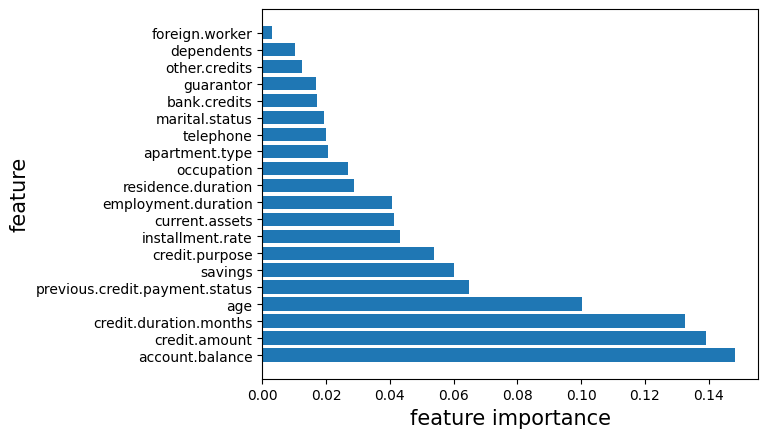

In [ ]:
plt.barh(feature_importances['col_names'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.4 부스팅
+ 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법이다.
+ 부스트랩을 병렬로 수행(각 모델을 독립적으로 구축)하는 배깅과 달리 순차방식으로 학습을 진행한다.
+ 훈련 단계에서 알고리즘은 각 결과 모델에 가중치를 할당하므로 분류 결과가 좋은 데이터는 높은 가중치를 좋지 않은 데이터는 낮은 가중치를 할당받아 다음 부스트래핑에서 추출될 확률이 높아짐
+ 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
+ train 데이터에 과적합할 위험이 있다.


__분류의 경우__
```
sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate = 1.0)
```

__회귀의 경우__
```
sklearn.ensemble.AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate = 1.0)
```

#### 3.4.1 부스팅(회귀)

In [ ]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
X = kc_house.drop(['id','date','price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [ ]:
reg.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [ ]:
print('train R2 :', reg.score(X_train, y_train))
print('test R2 :', reg.score(X_test, y_test))

train R2 : 0.18582585626446047
test R2 : 0.17620159616345


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : np.arange(0.01, 0.1, 0.02)}
model_grid_boost = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 5)
model_grid_boost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09])})

In [ ]:
model_grid_boost.best_estimator_

AdaBoostRegressor(learning_rate=0.08999999999999998)

In [ ]:
model_grid_boost.best_estimator_.score(X_train, y_train)

0.650075625851078

In [ ]:
model_grid_boost.best_estimator_.score(X_test, y_test)

0.5872459870885947

In [ ]:
# 변수 중요도 확인
model_grid_boost.best_estimator_.estimators_[0].feature_importances_

array([0.        , 0.        , 0.34005857, 0.        , 0.        ,
       0.        , 0.        , 0.5967645 , 0.        , 0.        ,
       0.06317694, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_boost.best_estimator_.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_names', 'feature_importance']
feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending= False).reset_index(drop = True)
feature_importances

,col_names,feature_importance
0,sqft_living,0.546540
1,grade,0.380740
2,yr_built,0.019189
3,view,0.015067
4,waterfront_standard,0.013993
5,sqft_above,0.011901
6,waterfront_river_view,0.008474
7,sqft_living15,0.004096
8,bedrooms,0.000000
9,bathrooms,0.000000


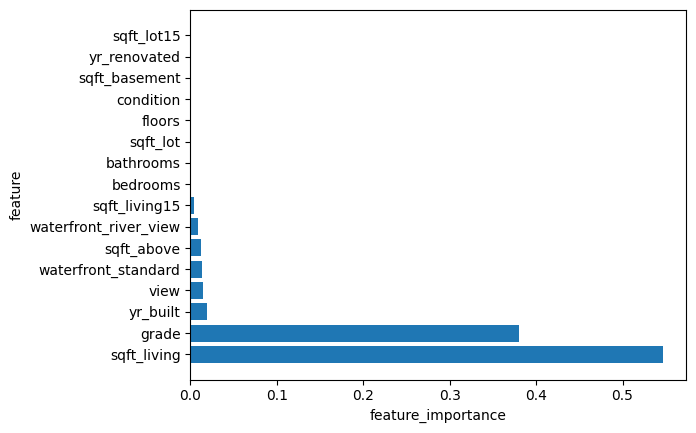

In [ ]:
plt.barh(feature_importances['col_names'], feature_importances['feature_importance'])
plt.xlabel('feature_importance')
plt.ylabel('feature')
plt.show()

#### 3.4.2 부스팅(분류)

In [ ]:
# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

adab = AdaBoostClassifier()
adab.fit(X_train, y_train)

xgb = XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False)
xgb = xgb.fit(X_train, y_train)

y_pred_adab = adab.predict(X_test)
print('train accuracy :', adab.score(X_train, y_train))
print('test accuracy :', adab.score(X_test, y_test))
print('\n')

y_pred_xgb = xgb.predict(X_test)
print('train accuracy :', xgb.score(X_train, y_train))
print('test accuracy :', xgb.score(X_test, y_test))

train accuracy : 0.8128571428571428
test accuracy : 0.7366666666666667


train accuracy : 1.0
test accuracy : 0.7433333333333333


In [ ]:
adab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
# 조정 가능한 파라미터 : n_estimators, max_depth, learning_ratef
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'learning_rate' : np.arange(0.5, 1.5, 0.1)}
model_grid_adaboost = GridSearchCV(AdaBoostClassifier(n_estimators = 100), param_grid, cv = 5)
model_grid_adaboost.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4])})

In [ ]:
param_grid = {'max_depth' : [3,4,5], 'learning_rate' : np.arange(0.01, 0.1, 0.02)}
model_grid_xgb = GridSearchCV(XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False), param_grid, cv = 5)
model_grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate..., max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09]),
                         'max_depth': [3, 4, 5]})

In [ ]:
model_grid_adaboost.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

In [ ]:
model_grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('AdaBoost')
print(model_grid_adaboost.best_estimator_.score(X_train, y_train))
print(model_grid_adaboost.best_estimator_.score(X_test, y_test))

print('\n')
print('xgboost')
print(model_grid_xgb.best_estimator_.score(X_train, y_train))
print(model_grid_xgb.best_estimator_.score(X_test, y_test))

AdaBoost
0.8042857142857143
0.7433333333333333


xgboost
0.9014285714285715
0.7433333333333333


In [ ]:
y_pred_adab = model_grid_adaboost.best_estimator_.predict(X_test)
y_pred_xgb = model_grid_xgb.best_estimator_.predict(X_test)

Adaboost 평가지표

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred_adab),
             index = ['True[0]', 'True[1]'],
             columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],45,47
True[1],30,178


In [ ]:
print('precision :', precision_score(y_test, y_pred_adab))
print('recall :', recall_score(y_test, y_pred_adab))
print('f1 score :', f1_score(y_test, y_pred_adab))

precision : 0.7911111111111111
recall : 0.8557692307692307
f1 score : 0.8221709006928407


xgb 평가지표

In [ ]:
# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred_xgb), index = ['True[0]', 'True[1]'], columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],38,54
True[1],23,185


In [ ]:
print('precision :', precision_score(y_test, y_pred_xgb))
print('recall :', recall_score(y_test, y_pred_xgb))
print('f1 score :', f1_score(y_test, y_pred_xgb))

precision : 0.7740585774058577
recall : 0.8894230769230769
f1 score : 0.8277404921700223


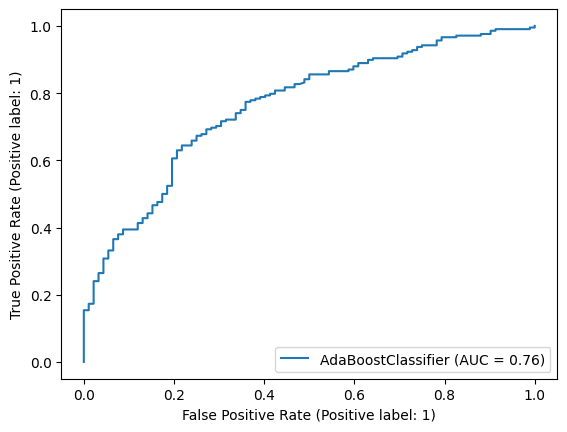

adaboost roc_auc_score : 0.7634563127090301




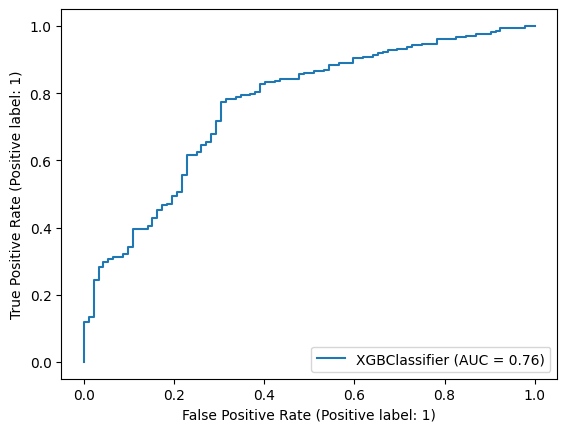

xgb roc_auc_score : 0.7626985785953176


In [ ]:
RocCurveDisplay.from_estimator(model_grid_adaboost.best_estimator_, X_test, y_test)
plt.show()
print('adaboost roc_auc_score :', roc_auc_score(y_test, model_grid_adaboost.best_estimator_.predict_proba(X_test)[:,-1]))
print('\n')

RocCurveDisplay.from_estimator(model_grid_xgb.best_estimator_, X_test, y_test)
plt.show()
print('xgb roc_auc_score :', roc_auc_score(y_test, model_grid_xgb.best_estimator_.predict_proba(X_test)[:,-1]))

In [ ]:
temp_data = pd.concat([pd.Series(y_pred_adab), pd.Series(y_pred_xgb)], axis = 1)
temp_data.columns = ['Ada', 'XGB']
temp_data

,Ada,XGB
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
295,0,0
296,1,0
297,1,1
298,1,1


In [ ]:
xgb = XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False)
xgb.fit(temp_data, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 스태킹(stacking)은 여러 개의 기계 학습 모델을 조합하여 최종 예측 모델을 만드는 앙상블 기법
y_pred_staking = xgb.predict(temp_data)

In [ ]:
y_pred_staking

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

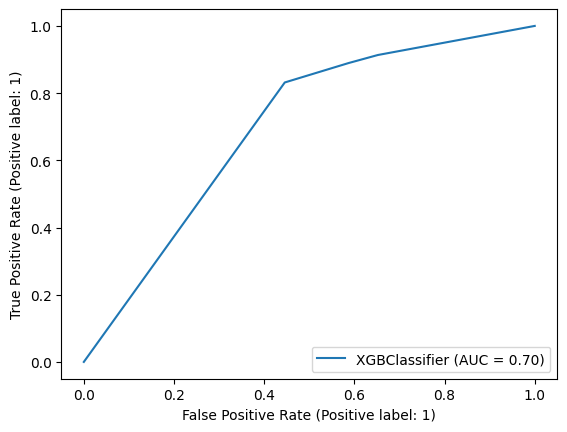

In [ ]:
RocCurveDisplay.from_estimator(xgb, temp_data, y_test)

## Chapter4 나이브베이즈 분류

### 베이즈 정리
+ 나이브 베이즈 알고리즘의 기본이 되는 개념
+ 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리
+ 사건 A, B가 있을 때, 사건 B가 일어난 것을 전제로 한 사건 A의 조건부 확률을 구하고자 한다.
+ 하지만 현재 가지고 있는 정보는 사건 A가 일어난 것을 전제로 한 사건 B의 조건부 확률과 A의 확률, B의 확률 뿐이다.
+ 이 때, 원래 구하고자 했던 것을 다음과 같이 구할 수 있다는 것이 베이즈 정리이다.

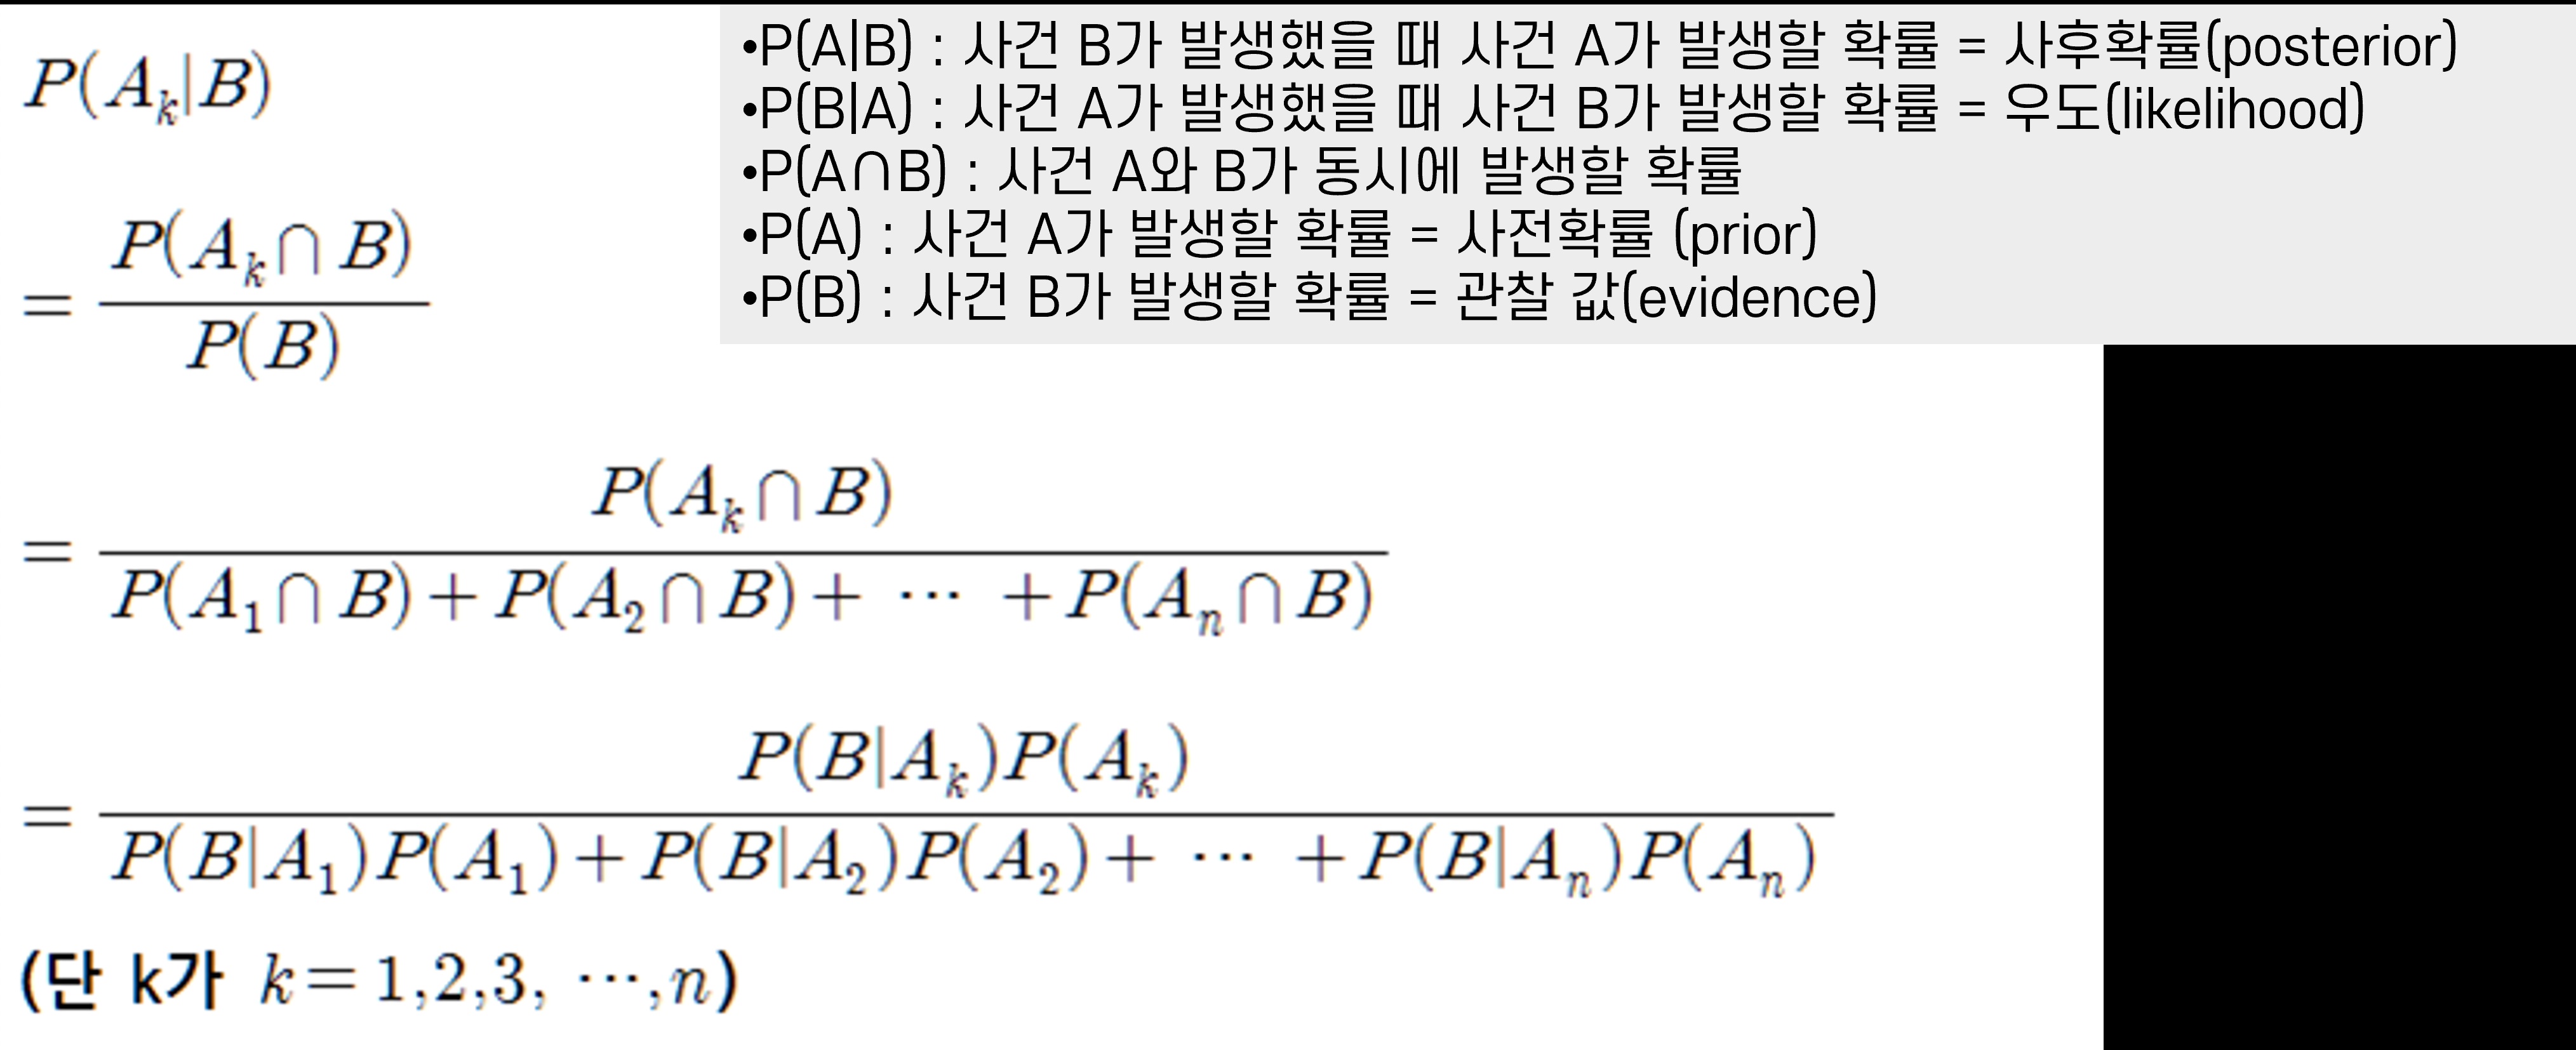

### 나이브 베이즈 분류

__종류__
1. GaussianNB : 정규분포 나이브베이즈
+ 독립변수가 연속형일 때
2. BernoulliNB : 베르누이분포 나이브베이즈
+ 독립변수가 이산형일 때
3. MultinomialNB : 다항분포 나이브베이즈
+ 다항분류

__개념__
+ 나이브 베이즈 분류는 하나의 속성 값을 기준으로 다른 속성이 독립적이라 전제했을 때 해당 속성 값이 클래스 분류에 미치는 영향을 측정한다.
+ 속성값에 대해 다른 속성이 독립적이라는 가정은 클래스 조건 독립성이라 한다.
+ n개의 특징에 대한 결합 조건부 분포는 특징들의 분포를 곱한 것으로 표현할 수 있음

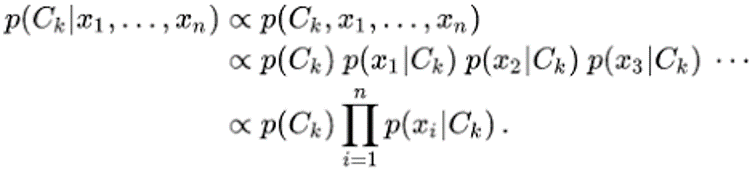

__베이지안 접근을 선택할 수 있는 두 가지 경우__
1. 과거의 빈도를 보여주는 데이터가 많지 않거나 자주 일어나지 않는 사건이어서 빈도주의적 추론의 사용이 마땅치 않은 경우  
  + 이 때는 빈도가 워낙 작아서 전통적 추정의 신뢰도가 크게 떨어지기 때문이다.

2. 초정의 목적이 모수 자체의 주정보다는 미래의 예측에 있는 경우
  + 베이지안 접근은 하나의 추정치를 고집하는 것이 아니라 계속해서 값을 수정하면서 좀 더 현실적인 추정치를 찾아나가기 때문에 예측의 목적에 잘 맞는 방법이다.

### 4.1 GaussianNB

In [1]:
import pandas as pd
# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify= y)
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
247,3,24,3,2,4151,2,2,2,3,1,3,2,35,2,2,2,3,1,1,1
667,2,13,3,3,882,1,1,4,3,2,4,1,23,2,2,2,3,1,1,1
191,2,36,2,3,3711,4,2,2,4,1,2,3,27,2,2,1,3,1,1,1
181,3,18,3,4,1055,1,1,4,1,1,1,2,30,2,2,2,3,1,1,1
368,1,15,2,4,1403,1,2,2,1,1,4,3,28,2,1,1,3,1,1,1


In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  

In [8]:
gnb = GaussianNB()
gnb.fit(X_train ,y_train)
y_pred = gnb.predict(X_test)
print('accuracy :', gnb.score(X_test, y_test))

accuracy : 0.76


In [9]:
gnb.class_prior_

array([0.3, 0.7])

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],58,32
True[1],40,170


In [14]:
print('precision :', precision_score(y_test, y_pred))
print('recall :', recall_score(y_test, y_pred))
print('f1_score :', f1_score(y_test, y_pred))

precision : 0.8415841584158416
recall : 0.8095238095238095
f1_score : 0.8252427184466018


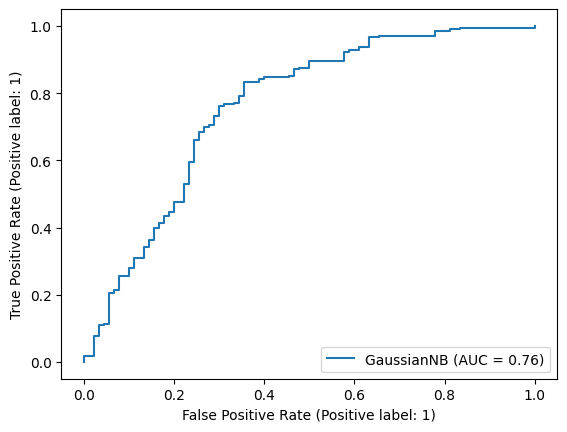

roc_auc score : 0.7606349206349206


In [19]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(gnb, X_test, y_test)
plt.show()
print('roc_auc score :', roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1]))

In [20]:
## 데이터의 수가 적을 경우에 아래와 같이 사전확률을 정해줄 수 있음
## 예를 들어 동전 뒤집기 하면 사전확률은 50 : 50 으로 알고 있지만 실제 시행은 다를 수 있음
## priors : 사전확률 0 : 50%, 사전확률 1 : 50%

gnb2 = GaussianNB(priors = [0.5, 0.5])
gnb2.fit(X_train ,y_train)
y_pred2 = gnb2.predict(X_test)
print('accuracy :', gnb2.score(X_test, y_test))

accuracy : 0.6966666666666667


### 4.2 BernoulliNB naive bayes

In [22]:
titanic = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [23]:
X = pd.get_dummies(data = titanic[['class','sex','embark_town']], columns = ['class','sex','embark_town'])
y = titanic['survived']

In [25]:
X.head()

,class_First,class_Second,class_Third,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [26]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X,y)

BernoulliNB()

In [31]:
bernoulli.class_log_prior_

array([-0.48424599, -0.95753369])

In [32]:
import numpy as np
np.exp(bernoulli.class_log_prior_)

array([0.61616162, 0.38383838])

In [33]:
X

,class_First,class_Second,class_Third,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [36]:
# 1등석, 여성, 셰르부르인 사람의 생존율 예측
X_test = [[1,0,0,1,0,1,0,0]]

bernoulli.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([[0.00477482, 0.99522518]])

### 4.3 Multinomial naive bayes
+ 독립변수가 이산형이 아닌 범주형 변수인 경우 사용

In [38]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

X = np.random.randint(5, size = (6, 100))
y = np.array([1,2,3,4,5,6])

In [41]:
X, y

(array([[1, 2, 1, 3, 4, 3, 2, 2, 4, 0, 2, 0, 2, 1, 1, 3, 0, 0, 0, 2, 1, 0,
         1, 4, 3, 0, 0, 0, 0, 4, 3, 0, 2, 0, 0, 2, 4, 3, 1, 3, 4, 2, 0, 2,
         2, 0, 0, 3, 1, 1, 2, 2, 2, 4, 1, 1, 1, 2, 4, 4, 4, 3, 2, 2, 3, 4,
         2, 3, 4, 3, 3, 1, 3, 3, 3, 0, 4, 3, 3, 3, 2, 3, 0, 4, 2, 0, 4, 2,
         4, 3, 4, 3, 2, 4, 3, 1, 2, 4, 2, 3],
        [2, 4, 3, 1, 3, 4, 4, 1, 4, 4, 3, 4, 3, 4, 0, 4, 4, 3, 4, 1, 1, 1,
         3, 1, 0, 4, 3, 1, 4, 1, 4, 1, 2, 1, 4, 3, 0, 2, 1, 0, 1, 0, 2, 1,
         4, 0, 0, 0, 2, 3, 1, 3, 4, 0, 4, 3, 1, 2, 1, 0, 0, 4, 1, 2, 3, 2,
         1, 4, 4, 3, 3, 3, 3, 0, 2, 0, 3, 4, 3, 0, 0, 2, 1, 0, 4, 0, 2, 1,
         2, 4, 3, 1, 3, 4, 3, 4, 4, 0, 3, 2],
        [4, 2, 1, 1, 3, 0, 2, 2, 2, 3, 1, 4, 4, 4, 3, 1, 3, 0, 2, 0, 4, 1,
         1, 4, 0, 2, 4, 1, 1, 3, 4, 3, 0, 1, 4, 1, 1, 3, 1, 4, 2, 2, 0, 2,
         4, 1, 4, 1, 0, 2, 2, 2, 4, 1, 0, 3, 2, 0, 2, 3, 0, 3, 1, 2, 2, 1,
         1, 4, 2, 1, 3, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2, 3, 2, 2, 0, 4, 2, 2,
        

In [42]:
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [46]:
np.exp(clf.class_log_prior_)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [48]:
clf.predict_proba([X[3]])

array([[2.19063845e-37, 2.32295725e-35, 4.03304475e-32, 1.00000000e+00,
        3.34651056e-36, 2.44979738e-34]])

## Chapter5 K-NN(K-Nearest Neighbor)

### 5.1 K-NN 알고리즘의 원리
+ K-NN 알고리즘에서는 새로운 데이터의 클래스를 할당 데이터와 가장 가까운 k개 데이터들의 클래스(범주)로 결정한다.
+ K-NN 알고리즘에서는 최근접 이웃 간의 거리를 계산할 때 유클리디안 거리, 맨하탄 거리, 민코우스키 거리 동을 사용할 수 있으며, 대표적으로 유클리디안 거리를 사용한다.

### 5.2 K의 선택
+ K의 선택은 학습의 난이도와 데이터의 개수에 따라 결정될 수 있으며, 일반적으로는 훈련 데이터 개수의 제곱근으로 설정한다. 그리고 짝수로 했을 때, 인접객체의 범주가 동률일 경우가 나오므로 일반적으로 홀수로 설정한다.

#### 5.2.1 실습

credit 데이터의 train 데이터로 K-NN 모델을 만들어 보자.

In [49]:
import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [69]:
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size = 0.3, random_state = 321)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier() ### k =5
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_auc_score
confusion_matrix(y_test, y_pred)

array([[ 22,  68],
       [ 40, 170]])

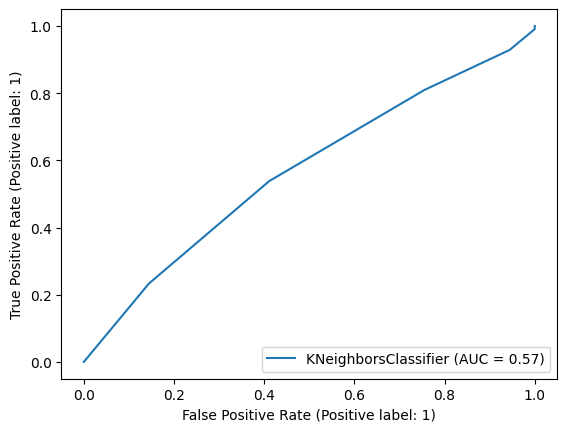

roc_auc_score : 0.5692592592592592


In [74]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

print('roc_auc_score :', roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

#### 5.2.2 최적의 k 찾기

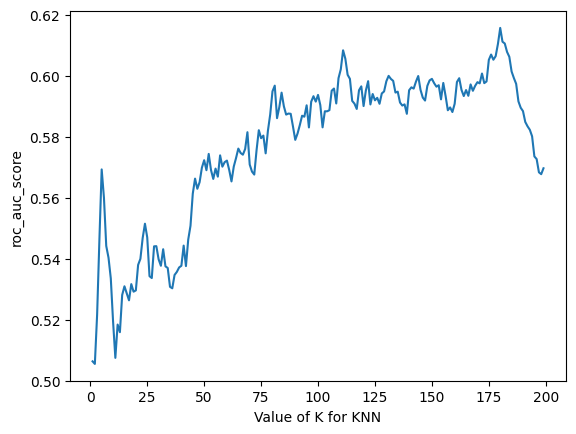

In [75]:
k_range = range(1,200)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train, y_train)
  scores = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
  k_scores.append(scores)

import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('roc_auc_score')
plt.show()

In [76]:
print(max(k_scores))
print(k_scores.index(max(k_scores)))

0.6156349206349208
179


#### 5.2.3 Cross-validation 을 활용한 최적의 k 찾기

In [80]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 100)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, X,y, cv = 10, scoring = 'accuracy')
  k_scores.append(scores.mean())

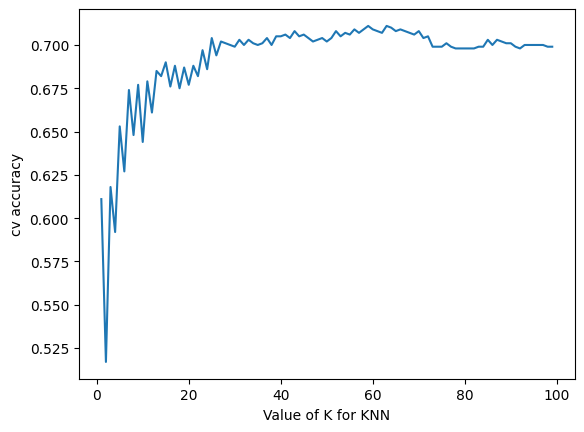

In [81]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('cv accuracy')
plt.show()

+ 분류분석의 평가지표가 ROC_AUC score 이므로 accuracy 를 사용한 k 값을 찾기보다는 앞서 사용한 방법을 선택한다.
+ k의 값을 179로 설정하고 다시 평가해보자

In [85]:
clf = KNeighborsClassifier(179) #### k = 30
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=179)

In [86]:
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[  0,  90],
       [  0, 210]])

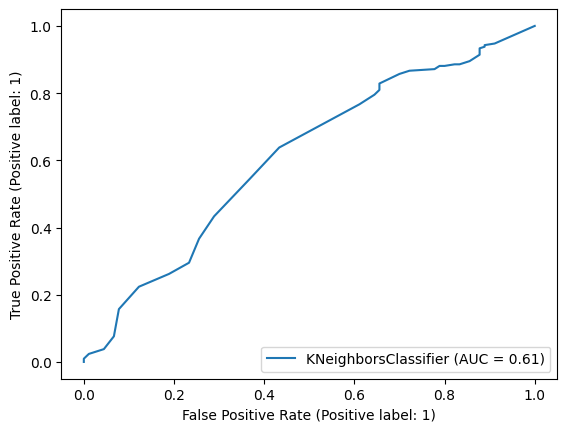

In [87]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

+ 이전보다는 좋은 모델이 되었지만 절대적으로 좋은 모델이라고 할 수 없다.
+ KNN은 단순한 모델로 분류분석에서 사용하기 보다는 결측치 제거나, 업샘플링에 사용하는 알고리즘으로 많이 사용된다.

## Chapter6 SVM(Support Vector Machine)
+ 새로운 데이터가 입력되었을 때 기존 데이터를 활용하여 분류하는 방법
+ 패턴 인식, 자료 분석 등을 위한 지도학습 모델로, 주로 회귀와 분류 문제 해결에 사용된다.

### 6.1 SVM 개념

+ SVM 분류 모델은 데이터 공간에 존재하는 경계로 표현되며, 데이터를 분류하는 여러 경계 중에서 가장 큰 마진으로 갖는 경계를 찾음
+ Support Vector 와 Hyperline(초평면)을 이용하여 분류를 수행함
+ 선형분류 뿐만 아니라 비선형 분류에도 사용되며, 비선형 분류에 있어서는 입력 자료를 다차원 공간에 매핑할 때 커널 트릭을 사용하기도 함
+ Decision Hyperline(결정 초평면) : 각 그룹을 구분하는 분류자로 어떤 n 차원의 공간에서 한 차원이 낮은 n-1 차원을 가짐
+ Support Vector : 초평면에 가장 가까이에 붙어있는 최전방 데이터
+ Margin(마진) : 서포트 벡터와 초평면 사이의 수직 거리

#### 6.1.1 장점
+ 범주나 수치 예측 문제에 사용 가능
+ 오류 데이터에 대한 영향이 없음
+ 과적합되는 경우가 적음
+ 신경망에 비해 사용하기 쉬움

#### 6.1.2 단점
+ 여러 개의 조합 테스트 필요
+ 학습 속도가 느림
+ 해석이 어렵고 복잡한 모델

__[참고] 커널트릭__  
데이터를 선형 모델 분류하고자 할 때, 선형으로 완전히 분류할 수 없는 데이터의 차원을 올려주어 선으로 분류할 수 있게 하는 방법

분류의 경우
```
sklearn.svm.SVC(...)
```

회귀의 경우
```
sklearn.svm.SVR(...)
```

+ kernel : 알고리즘에서 사용할 커널 유형(선형, 폴리곤, 방사형, 시그모이드)
  + ({'linear', 'poly', 'rbf', 'sigmoid'}, default = 'rbf')
+ degree : kernel 이 poly 일 때 그 차수 (int, default = 3)
+ gamma : 결정 경계의 곡률로 kernel이 'rbf', 'poly', 'sigmoid' 일 때 튜닝 ({'scale', 'auto'} or float, default = 'scale')
  + gamma 값이 클수록 모델은 복잡해지고, 작을수록 모델은 단순화 됨.
  + scale 의 경우 gamma = 1 / (n_features * X.var())
+ C : 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도 (float, default = 1.0)
  + C 값이 클수록 모델은 복잡해지고, 작을수록 모델은 단순화 됨

### 6.2 SVC(SVM 분류) 실습

credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 SVM 모델을 만들어라

In [88]:
import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size = 0.3, random_state = 321)

In [89]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [90]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [91]:
svc.score(X_train, y_train)

0.7157142857142857

In [92]:
svc.score(X_test, y_test)

0.69

In [94]:
print('precision :', precision_score(y_test, y_pred))
print('recall :', recall_score(y_test, y_pred))
print('f1 score :', f1_score(y_test, y_pred))

precision : 0.708185053380783
recall : 0.9476190476190476
f1 score : 0.8105906313645621


In [95]:
confusion_matrix(y_test, y_pred)

array([[  8,  82],
       [ 11, 199]])

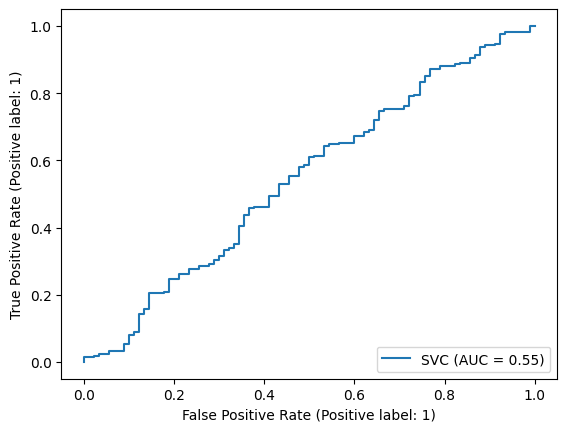

In [96]:
RocCurveDisplay.from_estimator(svc, X_test, y_test)

In [98]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

param_grid = {'gamma' : [0.1, 1, 10], 'C' : [0.01, 0.1, 0.5, 1, 10, 20, 30]}

grid_svc = GridSearchCV(SVC(), param_grid, cv = 5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 20, 30],
                         'gamma': [0.1, 1, 10]})

In [110]:
result = pd.DataFrame(grid_svc.cv_results_['params'])
result['mean_test_score'] = grid_svc.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,C,gamma,mean_test_score
0,0.01,0.1,0.7
11,1.00,10.0,0.7
19,30.00,1.0,0.7
18,30.00,0.1,0.7
17,20.00,10.0,0.7
16,20.00,1.0,0.7
15,20.00,0.1,0.7
14,10.00,10.0,0.7
13,10.00,1.0,0.7
12,10.00,0.1,0.7


In [111]:
print('best params :', grid_svc.best_params_)

best params : {'C': 0.01, 'gamma': 0.1}


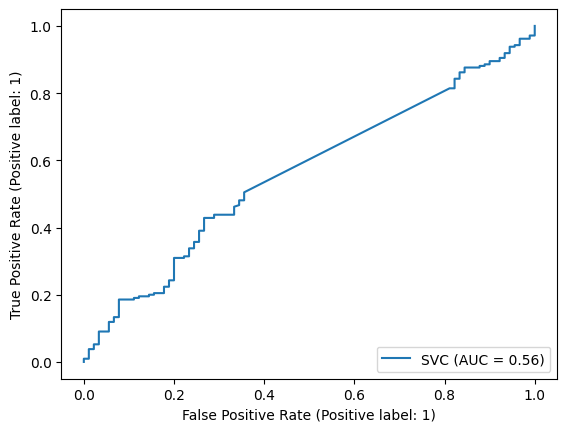

In [112]:
RocCurveDisplay.from_estimator(SVC(C = 0.01, gamma = 0.1).fit(X_train, y_train), X_test, y_test)

In [116]:
## SVM 모델은 꼭 스케일링을 해주어야 한다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [119]:
param_grid = {'gamma' : [0.01, 0.1, 1, 10], 'C' : [0.01, 0.1, 0.5, 1, 10, 20, 30]}
grid_svc = GridSearchCV(SVC(), param_grid, cv = 5)
grid_svc.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svc.cv_results_['params'])
result['mean_test_score'] = grid_svc.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending= False)

,C,gamma,mean_test_score
20,20.00,0.01,0.760000
13,1.00,0.10,0.758571
24,30.00,0.01,0.754286
16,10.00,0.01,0.751429
17,10.00,0.10,0.744286
21,20.00,0.10,0.742857
14,1.00,1.00,0.738571
9,0.50,0.10,0.734286
25,30.00,0.10,0.731429
18,10.00,1.00,0.727143


In [120]:
print('best parmas : ', grid_svc.best_params_)

best parmas :  {'C': 20, 'gamma': 0.01}


In [127]:
svc = SVC(C = 20, gamma = 0.01, probability= True)
svc.fit(X_train_scaled, y_train)

SVC(C=20, gamma=0.01, probability=True)

In [128]:
svc.score(X_test_scaled, y_test)

0.77

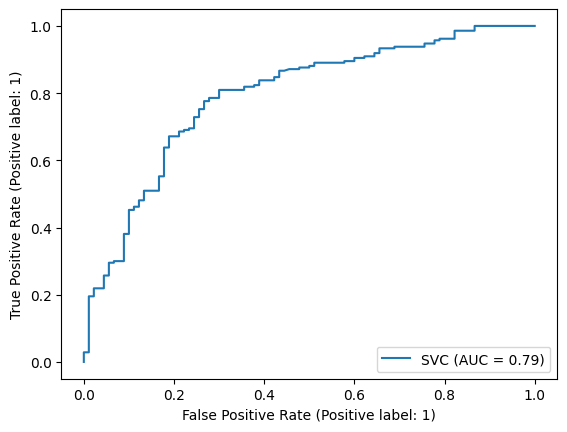

roc_auc score : 0.7925132275132275


In [129]:
RocCurveDisplay.from_estimator(svc, X_test_scaled, y_test)
plt.show()

print('roc_auc score :', roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:, 1]))

### 6.3 SVR(SVM 회귀) 실습

kc_house_data 데이터의 train 데이터로 price 를 예측하는 SVR 모델 만들어라

In [1]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [3]:
X = kc_house.drop(['id','date', 'price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파리미터 값들을 사전타입으로 정의
param_grid = [{'kernel' : ['linear'], 'C' : [10, 30, 100, 300, 1000, 10000]},
              {'kernel' : ['rbf'], 'C' : [1,3,10,30,100,300], 'gamma' : [0.03, 0.1, 0.3, 1.0, 3.0]}]

grid_svr = GridSearchCV(SVR(), param_grid, cv = 5)
grid_svr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10, 30, 100, 300, 1000, 10000],
                          'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300],
                          'gamma': [0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [11]:
result = pd.DataFrame(grid_svr.cv_results_['params'])
result['mean_test_score'] = grid_svr.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,C,kernel,gamma,mean_test_score
5,10000,linear,NaN,0.624027
4,1000,linear,NaN,0.621285
3,300,linear,NaN,0.615199
2,100,linear,NaN,0.599909
1,30,linear,NaN,0.543711
0,10,linear,NaN,0.418333
31,300,rbf,0.03,0.259002
32,300,rbf,0.10,0.188921
26,100,rbf,0.03,0.112732
27,100,rbf,0.10,0.075802


In [12]:
grid_svr.best_params_

{'C': 10000, 'kernel': 'linear'}

In [13]:
SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
param_grid = {'C' : [10000, 100000], 'gamma' : [0.001, 0.01, 0.1], 'kernel' : ['linear']}
grid_svr = GridSearchCV(SVR(), param_grid, cv = 3)
grid_svr.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svr.cv_results_['params'])
result['mean_test_score'] = grid_svr.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,C,gamma,kernel,mean_test_score
3,100000,0.001,linear,0.624680
4,100000,0.010,linear,0.624680
5,100000,0.100,linear,0.624680
0,10000,0.001,linear,0.624552
1,10000,0.010,linear,0.624552
2,10000,0.100,linear,0.624552


In [ ]:
# C 가 클수록 좋아짐 더 크게 설정해보자

In [ ]:
param_grid = {'C' : [10000000, 100000000], 'gamma' : [0.001, 0.01], 'kernel' : ['linear']}
grid_svr = GridSearchCV(SVR(), param_grid, cv = 3)
grid_svr.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svr.cv_results_['params'])
result['mean_test_score'] = grid_svr.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

## Chapter7 인공신경망

### 7.1 특징
+ 인공신경망 모형은 동물의 뇌신경계를 모방하여 분류 또는 예측하기 위해 만들어진 모형이다. 인공신경망에서는 입력은 인간의 뇌의 시냅스에 해당하며 개별 신호의 강도에 따라 가중되며, 활성 함수는 인공신경망의 출력을 계산한다.
+ 인공신경망은 가중치를 반복적으로 조정하며 학습하며 뉴런들은 링크로 연결되어 있고, 각 링크에는 수치적인 가중치가 있다. 인공신경망은 신경망의 가중치를 초기화하고 훈련 데이터를 통해 가중치를 갱신하여 신경망의 구조를 선택하고, 활용할 학습 알고리즘을 결정한 후 신경망을 훈련시킨다.


가. 구조
+ 입력 링크에서 여러 신호를 받아서 새로운 활성화 수준을 계산하고, 출력 링크로 출력 신호를 보낸다.
+ 입력신호는 미가공 데이터 또는 다른 뉴런으로 출력이 될 수 있으며, 출력신호는 문제의 최종적인 해가 되거나 다른 뉴런에 입력될 수 있다.

나. 뉴런의 계산
+ 뉴런은 활성화 함수를 사용하며, 활성화 함수를 이용해 출력을 결정하며 입력신호의 가중치 합을 계산하여 임계값과 비교한다.
+ 가중치 합이 임계값보다 작으면 뉴런의 출력은 -1, 같거나 크면 +1 을 출력한다.

다. 뉴런의 활성화 함수
+ 시그모이드 함수의 경우 로지스틱 회귀분석과 유사하며, 0~1의 확률값을 가진다.
+ softmax 함수 : 표준화지수 함수로도 불리며, 출력값이 여러 개로 주어지고 목표치가 다범주인 경우 각 범주에 속할 사후확률을 제공하는 함수이다.
+ Relu 함수 : max(0, x)로 최근 딥러닝에 많이 활용하는 함수이다.

### 7.2 sklearn.neural_network.MLPClassifier

```
class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *,
solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',
learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
n_iter_no_change=10, max_fun=15000)
```

### 7.3 조정 할만한 매개변수
1. hidden_layer_sizes
> tuple, length = n_layers -2, default = (100,)

2. activation {'identity', 'logistic', 'tanh', 'relu'}, default = 'relu
> 'identity' : 선형함수  
'logistic' : 시그모이드 함수, f(x) = 1 / (1+ exp(-x)) 값을 리턴  
'tanh' : 탄젠트 함수 f(x) = tanh(x) 값을 리턴  
'relu' : 수정된 선형 함수, f(x) = max(0, x) 값을 리턴

3. solver {'lbfgs', 'sgd', 'adam'}, default = 'adam'
> 'lbfgs; : quasi-Newton 방법 계열의 최적화 도구로 0 또는 함수의 극대값과 극소값을 찾는데 사용되는 방법  
'sgd' : 경사하강법  
'adam' : 확률적 기울기 기반 옵티마이저  
큰 데이터 셋에는 adam, 작은 데이터 셋에는 lbfgs 를 추천

### 7.4 인공신경망 분류 실습

credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 인공신경망 모델 만들어라

1. 독립변수 종속변수 분리하고 train, test 셋 분리
2. MLPClassifier 바로 적용해서 평가지표 값 확인(accuracy, 오차행렬, precision, recall, f1, roc_auc score, RocCurve)
3. GirdSearchCV 적용해서 최적의 파라미터 확인
4. 최적의 파라미터로 y_pred_grid 만들어서 2번 다시 확인
5. 성능 향상 확인

In [34]:
import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size = 0.3, random_state = 321)

In [35]:
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
75,2,9,2,2,2030,4,3,2,3,1,1,3,24,2,2,1,3,1,2,1
112,2,12,3,4,2366,3,3,3,1,1,3,3,36,2,2,1,4,1,2,1
327,3,6,3,4,1343,1,4,1,3,1,4,1,46,2,2,2,3,2,1,2
894,2,24,3,2,2064,1,1,3,1,1,2,2,34,2,2,1,4,1,2,1
437,3,6,3,3,935,1,2,3,1,1,2,1,24,2,2,1,3,1,1,1


In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [37]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
mlp.score(X_test, y_test)

0.41333333333333333

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)

In [40]:
mlp.fit(X_train_scaled, y_train)
mlp.score(X_test_scaled, y_test)

0.7466666666666667

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

y_pred = mlp.predict(X_test_scaled)

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],44,46
True[1],30,180


In [42]:
print(mlp.score(X_test_scaled, y_test)) # accuracy
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7466666666666667
0.7964601769911505
0.8571428571428571
0.8256880733944955


In [13]:
roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:,1])

0.7476719576719576

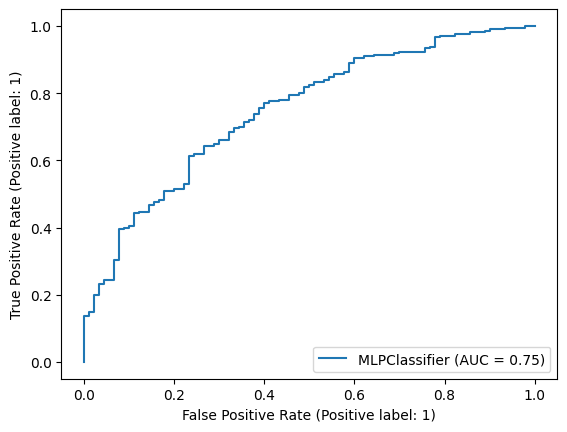

In [14]:
RocCurveDisplay.from_estimator(mlp, X_test_scaled, y_test)

GridSearchCV 사용

In [15]:
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [6]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes' : [10, 30, 50, 100],
              'solver' : ['sgd','adam'],
              'activation' : ['tanh','relu'],
              'max_iter' : [1000]}
grid_mlp = GridSearchCV(MLPClassifier(), param_grid, cv = 3, verbose = True)
grid_mlp.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [10, 30, 50, 100],
                         'max_iter': [1000], 'solver': ['sgd', 'adam']},
             verbose=True)

In [21]:
result = pd.DataFrame(grid_mlp.cv_results_['params'])
result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,activation,hidden_layer_sizes,max_iter,solver,mean_test_score
4,tanh,50,1000,sgd,0.755756
0,tanh,10,1000,sgd,0.752901
6,tanh,100,1000,sgd,0.751452
12,relu,50,1000,sgd,0.745742
14,relu,100,1000,sgd,0.742929
10,relu,30,1000,sgd,0.742899
2,tanh,30,1000,sgd,0.740025
8,relu,10,1000,sgd,0.738613
1,tanh,10,1000,adam,0.715760
7,tanh,100,1000,adam,0.710068


In [22]:
grid_mlp.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 50,
 'max_iter': 1000,
 'solver': 'sgd'}

In [30]:
y_pred_grid = grid_mlp.best_estimator_.predict(X_test_scaled)

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred_grid), index = ['True[0]', 'True[1]'], columns = ['pred[0]', 'pred[1]'])

,pred[0],pred[1]
True[0],39,51
True[1],26,184


In [31]:
print(precision_score(y_test, y_pred_grid))
print(recall_score(y_test, y_pred_grid))
print(f1_score(y_test, y_pred_grid))

0.7829787234042553
0.8761904761904762
0.8269662921348315


In [27]:
roc_auc_score(y_test, grid_mlp.best_estimator_.predict_proba(X_test_scaled)[:, 1])

0.7798412698412698

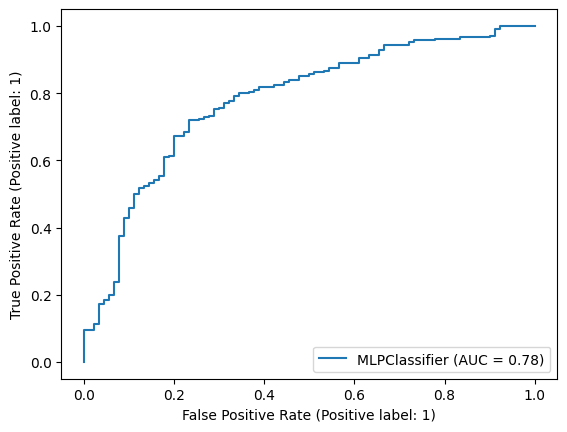

In [32]:
RocCurveDisplay.from_estimator(grid_mlp.best_estimator_, X_test_scaled, y_test)

### 7.5 인공신경망(회귀) 실습

1. 독립변수 종속변수 분리하고 train, test 셋 분리
2. MLPRegressor 바로 적용해서 평가지표 값 확인(R2, mean_square_error)
3. GirdSearchCV 적용해서 최적의 파라미터 확인
4. 최적의 파라미터로 y_pred_grid 만들어서 2번 다시 확인
5. 성능 향상 확인

In [2]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [11]:
X = kc_house.drop(['id','date','price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)

In [13]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
# R2
mlp.score(X_test_scaled, y_test)

-1.1522566346990502

In [5]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mse = mean_absolute_error(y_test, y_pred)
print('mse :',mean_absolute_error(y_test, y_pred))
print('rmse :', np.sqrt(mse))

mse : 456292.14314712153
rmse : 675.493999342053


In [52]:
MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [20]:
mlpr = MLPRegressor(hidden_layer_sizes=(64,64,64,64,64), activation = 'relu', max_iter = 1000, random_state = 42)
mlpr.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=1000,
             random_state=42)

In [21]:
print(mlpr.score(X_train_scaled, y_train))
print(mlpr.score(X_test_scaled, y_test))

0.8250684519832814
0.7379725974868281


In [ ]:
# 그리드서치를 할 때도 있고 안할 때도 있는데 이거 구분은??

# from sklearn.model_selection import GridSearchCV
# param_grid = {'hidden_layer_sizes' : [10, 30, 50, 100],
#               'solver' : ['sgd','adam'],
#               'activation' : ['tanh','relu'],
#               'max_iter' : [1000]}

# grid_mlp = GridSearchCV(MLPRegressor(), param_grid, cv = 3)
# grid_mlp.fit(X_train_scaled, y_train)

## Chapter8 클래스 불균형 처리